# Análisis Exploratorio de Datos - Predicción de Precios de Alquiler en AMBA

## Integrantes del Equipo
- Ignacio Bruzone
- Felix Lopez Menardi
- Christian Ijjas

## Fecha de Entrega
06/10/2025

---

## Tabla de Contenidos
1. [Descripción del Dataset](#1-descripción-del-dataset)
2. [Análisis Exploratorio Básico](#2-análisis-exploratorio-básico)
3. [Diagnóstico y Mejoras en la Calidad de los Datos](#3-diagnóstico-y-mejoras-en-la-calidad-de-los-datos)
4. [Transformaciones Realizadas](#4-transformaciones-realizadas)
5. [Reflexión Final](#5-reflexión-final)

---


## 1. Descripción del Dataset

### 1.1 Origen y Formato

El dataset `alquiler_AMBA_dev.csv` contiene información sobre precios de alquiler de propiedades en el Área Metropolitana de Buenos Aires (AMBA), extraída de Mercado Libre Argentina durante los años 2021 y 2022.

**Características del formato:**
- **Formato**: CSV (Comma Separated Values)
- **Tamaño**: 278,726 registros
- **Período**: 2021-2022
- **Fuente**: Mercado Libre Argentina
- **Geolocalización**: Polígonos de 200m x 200m para anonimización

### 1.2 Variables Incluidas y su Significado

El dataset incluye las siguientes categorías de variables:

#### Variables de Identificación y Ubicación
- **id_grid**: ID único del polígono geográfico
- **LONGITUDE/LATITUDE**: Coordenadas del centroide del polígono
- **ITE_ADD_CITY_NAME**: Ciudad donde se encuentra la propiedad
- **ITE_ADD_STATE_NAME**: Provincia de ubicación
- **ITE_ADD_NEIGHBORHOOD_NAME**: Barrio de ubicación

#### Variables Temporales
- **MesListing**: Mes de publicación del anuncio
- **year**: Año de publicación

#### Variables Físicas de la Propiedad
- **TIPOPROPIEDAD**: Tipo de propiedad (Departamento, Casa, etc.)
- **STotalM2**: Superficie total en metros cuadrados
- **SConstrM2**: Superficie construida en metros cuadrados
- **Dormitorios**: Cantidad de dormitorios
- **Banos**: Cantidad de baños
- **Ambientes**: Cantidad total de ambientes
- **Antiguedad**: Antigüedad de la propiedad en años

#### Variables de Características y Amenities
Variables binarias (Sí/No) para amenities como:
- **Amoblado**: Propiedad amoblada
- **Cisterna, AccesoInternet, BusinessCenter, Gimnasio, Laundry**
- **Calefaccion, AireAC, Estacionamiento, Ascensor, Seguridad**
- **Pileta, Cocheras, SalonFiestas, Jacuzzi, Chimenea**
- Y muchas más amenities detalladas...

#### Variable Target
- **precio_pesos_constantes**: Precio de alquiler ajustado por inflación (variable objetivo)

### 1.3 Justificación de la Elección del Dataset

**Ventajas del dataset:**
1. **Representatividad**: Cobertura completa del AMBA con datos de Mercado Libre (plataforma líder)
2. **Tamaño**: 278,726 registros proporcionan una base sólida para modelado
3. **Variables Ricas**: Incluye características físicas, amenities, y ubicación geográfica
4. **Ajuste por Inflación**: Precios en pesos constantes eliminan el sesgo temporal
5. **Geolocalización Anonimizada**: Balance entre precisión espacial y privacidad
6. **Período Reciente**: Datos de 2021-2022 son representativos del mercado actual

**Limitaciones identificadas:**
1. **Solo Mercado Libre**: Puede no representar el mercado completo
2. **Anonimización Geográfica**: Polígonos de 200m pueden perder precisión espacial
3. **Dependencia de Publicaciones Online**: Sesgo hacia propiedades con mejor marketing digital


In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.offline as pyo

# Configuración de visualizaciones
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("Librerías importadas exitosamente")
print(f"Fecha de ejecución: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")


Librerías importadas exitosamente
Fecha de ejecución: 2025-10-05 12:52:22


In [2]:
# Cargar el dataset
df = pd.read_csv('data/alquiler_AMBA_dev.csv')

print(f"Dataset cargado exitosamente")
print(f"Dimensiones del dataset: {df.shape}")
print(f"Memoria utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Mostrar las primeras filas
print("\nPrimeras 5 filas del dataset:")
df.head()


Dataset cargado exitosamente
Dimensiones del dataset: (278725, 45)
Memoria utilizada: 431.11 MB

Primeras 5 filas del dataset:


,id_grid,MesListing,TIPOPROPIEDAD,STotalM2,SConstrM2,Dormitorios,Banos,Ambientes,SitioOrigen,Amoblado,Antiguedad,Cisterna,AccesoInternet,BusinessCenter,Gimnasio,Laundry,Calefaccion,SalonDeUsosMul,AireAC,Recepcion,Estacionamiento,Jacuzzi,AreaJuegosInfantiles,Chimenea,Ascensor,SalonFiestas,Seguridad,Pileta,Cocheras,PistaJogging,EstacionamientoVisitas,Lobby,LocalesComerciales,SistContraIncendios,AreaParrillas,CanchaTennis,AreaCine,ITE_ADD_CITY_NAME,ITE_ADD_STATE_NAME,ITE_ADD_NEIGHBORHOOD_NAME,ITE_TIPO_PROD,LONGITUDE,LATITUDE,precio_pesos_constantes,year
0,59362,2022-08-01,Departamento,39.0,36.0,1,1,2,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,Caseros,Bs.As. G.B.A. Oeste,Caseros,N,-58.566145,-34.599299,6.279294e+03,2022
1,68287,2021-04-01,Departamento,47.0,40.0,1,1,2,0,No,7 años,0,No,0,No,No,No,No,Sí,0,0,No,0,0,0,0,No,No,0,0.0,0,0.0,0.0,0,0.0,0,0,Capital Federal,Capital Federal,Núñez,U,-58.473708,-34.551759,1.092339e+04,2021
2,59774,2021-09-01,Departamento,128.0,63.0,1,1,3,0,No,40 años,0,No,0,No,No,No,No,Sí,0,0,No,0,0,0,0,Sí,No,0,0.0,0,0.0,0.0,0,0.0,0,0,Capital Federal,Capital Federal,NaN,U,-58.385136,-34.599685,1.081992e+04,2021
3,62402,2022-11-01,Departamento,436.0,436.0,2,3,8,NaN,NaN,50.0,NaN,0.0,NaN,0.0,NaN,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,Capital Federal,Capital Federal,Recoleta,U,-58.393617,-34.585162,1.230069e+05,2022
4,57804,2021-04-01,Departamento,300.0,300.0,2,4,6,0,No,0,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,0.0,No,0.0,0.0,0,0.0,No,0,Capital Federal,Capital Federal,Monserrat,U,-58.376592,-34.610603,7.714647e+06,2021


## 2. Análisis Exploratorio Básico

### 2.1 Tipos de Variables


In [3]:
# Análisis de tipos de datos
print("=== ANÁLISIS DE TIPOS DE DATOS ===")
print(f"Total de columnas: {len(df.columns)}")
print(f"Total de registros: {len(df)}")

# Información general del dataset
print("\nInformación detallada de tipos de datos:")
print(df.info())

# Clasificación de variables por tipo
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
datetime_cols = df.select_dtypes(include=['datetime64']).columns.tolist()

print(f"\n=== CLASIFICACIÓN DE VARIABLES ===")
print(f"Variables numéricas ({len(numeric_cols)}): {numeric_cols}")
print(f"Variables categóricas ({len(categorical_cols)}): {categorical_cols}")
print(f"Variables de fecha ({len(datetime_cols)}): {datetime_cols}")

# Crear un DataFrame con información de tipos
types_info = pd.DataFrame({
    'Columna': df.columns,
    'Tipo': df.dtypes,
    'Valores_Únicos': df.nunique(),
    'Valores_Nulos': df.isnull().sum(),
    'Porcentaje_Nulos': (df.isnull().sum() / len(df)) * 100
})

print("\n=== RESUMEN DE TIPOS Y VALORES NULOS ===")
types_info


=== ANÁLISIS DE TIPOS DE DATOS ===
Total de columnas: 45
Total de registros: 278725

Información detallada de tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278725 entries, 0 to 278724
Data columns (total 45 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id_grid                    278725 non-null  int64  
 1   MesListing                 278725 non-null  object 
 2   TIPOPROPIEDAD              278725 non-null  object 
 3   STotalM2                   278705 non-null  float64
 4   SConstrM2                  278705 non-null  float64
 5   Dormitorios                278725 non-null  int64  
 6   Banos                      278725 non-null  int64  
 7   Ambientes                  278725 non-null  int64  
 8   SitioOrigen                188004 non-null  object 
 9   Amoblado                   246475 non-null  object 
 10  Antiguedad                 252752 non-null  object 
 11  Cisterna         

,Columna,Tipo,Valores_Únicos,Valores_Nulos,Porcentaje_Nulos
id_grid,id_grid,int64,13273,0,0.000000
MesListing,MesListing,object,24,0,0.000000
TIPOPROPIEDAD,TIPOPROPIEDAD,object,1,0,0.000000
STotalM2,STotalM2,float64,578,20,0.007176
SConstrM2,SConstrM2,float64,498,20,0.007176
Dormitorios,Dormitorios,int64,21,0,0.000000
Banos,Banos,int64,20,0,0.000000
Ambientes,Ambientes,int64,28,0,0.000000
SitioOrigen,SitioOrigen,object,5,90721,32.548569
Amoblado,Amoblado,object,7,32250,11.570544


### 2.2 Distribuciones y Estadísticas Descriptivas


In [4]:
# Estadísticas descriptivas para variables numéricas
print("=== ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS ===")
numeric_stats = df[numeric_cols].describe()
print(numeric_stats)

# Estadísticas adicionales
print("\n=== ESTADÍSTICAS ADICIONALES ===")
additional_stats = pd.DataFrame({
    'Media': df[numeric_cols].mean(),
    'Mediana': df[numeric_cols].median(),
    'Moda': df[numeric_cols].mode().iloc[0] if len(df[numeric_cols].mode()) > 0 else 'N/A',
    'Desv_Est': df[numeric_cols].std(),
    'Coef_Var': df[numeric_cols].std() / df[numeric_cols].mean(),
    'Asimetría': df[numeric_cols].skew(),
    'Curtosis': df[numeric_cols].kurtosis()
})

additional_stats


=== ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS ===
             id_grid      STotalM2     SConstrM2    Dormitorios  \
count  278725.000000  2.787050e+05  2.787050e+05  278725.000000   
mean    59833.062739  3.739940e+03  3.356831e+04       1.422237   
std     14774.014764  9.492445e+05  8.415217e+06       1.199622   
min       124.000000  0.000000e+00  0.000000e+00       0.000000   
25%     53518.000000  3.800000e+01  3.600000e+01       1.000000   
50%     60083.000000  5.000000e+01  4.600000e+01       1.000000   
75%     65662.000000  7.600000e+01  7.000000e+01       2.000000   
max     97826.000000  3.321555e+08  2.287862e+09      99.000000   

               Banos      Ambientes       Cocheras  PistaJogging     Lobby  \
count  278725.000000  278725.000000  278725.000000      188004.0  188004.0   
mean        1.335632       2.389473       0.402454           0.0       0.0   
std         1.023134       1.392421       2.088215           0.0       0.0   
min        -1.000000       0

,Media,Mediana,Moda,Desv_Est,Coef_Var,Asimetría,Curtosis
id_grid,59833.062739,60083.000000,57811.000000,1.477401e+04,0.246921,-0.096716,1.553364
STotalM2,3739.939588,50.000000,40.000000,9.492445e+05,253.812789,320.048512,108902.522936
SConstrM2,33568.309869,46.000000,40.000000,8.415217e+06,250.689317,263.479664,69633.015141
Dormitorios,1.422237,1.000000,1.000000,1.199622e+00,0.843476,22.357779,1643.693794
Banos,1.335632,1.000000,1.000000,1.023134e+00,0.766030,74.505078,14015.956436
Ambientes,2.389473,2.000000,2.000000,1.392421e+00,0.582731,32.174862,4091.000658
Cocheras,0.402454,0.000000,0.000000,2.088215e+00,5.188703,94.986039,10562.388040
PistaJogging,0.000000,0.000000,0.000000,0.000000e+00,NaN,0.000000,0.000000
Lobby,0.000000,0.000000,0.000000,0.000000e+00,NaN,0.000000,0.000000
LocalesComerciales,0.000000,0.000000,0.000000,0.000000e+00,NaN,0.000000,0.000000


In [5]:
# Análisis de variables categóricas
print("=== ANÁLISIS DE VARIABLES CATEGÓRICAS ===")

for col in categorical_cols:
    print(f"\n--- {col} ---")
    print(f"Valores únicos: {df[col].nunique()}")
    print(f"Valores nulos: {df[col].isnull().sum()}")
    print("Top 10 valores más frecuentes:")
    print(df[col].value_counts().head(10))
    print("-" * 50)


=== ANÁLISIS DE VARIABLES CATEGÓRICAS ===

--- MesListing ---
Valores únicos: 24
Valores nulos: 0
Top 10 valores más frecuentes:
MesListing
2021-08-01    13283
2021-07-01    12708
2021-09-01    12619
2021-06-01    12570
2021-11-01    12367
2021-10-01    12313
2021-01-01    12147
2022-11-01    11817
2021-05-01    11539
2022-10-01    11427
Name: count, dtype: int64
--------------------------------------------------

--- TIPOPROPIEDAD ---
Valores únicos: 1
Valores nulos: 0
Top 10 valores más frecuentes:
TIPOPROPIEDAD
Departamento    278725
Name: count, dtype: int64
--------------------------------------------------

--- SitioOrigen ---
Valores únicos: 5
Valores nulos: 90721
Top 10 valores más frecuentes:
SitioOrigen
0.0                         121640
0                            46816
0.0                          19539
churbapropiedades.com.ar         7
administracional.com.ar          2
Name: count, dtype: int64
--------------------------------------------------

--- Amoblado ---
Valores

### 2.3 Análisis de Valores Faltantes


MISSING VALUES SUMMARY
Total rows: 278,725
Total columns: 45
Columns with missing values: 31/45
Total missing cells: 1,705,559
Overall missing percentage: 13.60%

COLUMNS WITH MISSING VALUES:
--------------------------------------------------------------------------------
                   column  missing_count  missing_pct   dtype
     AreaJuegosInfantiles          90721    32.548569  object
              SitioOrigen          90721    32.548569  object
      SistContraIncendios          90721    32.548569  object
       LocalesComerciales          90721    32.548569 float64
                    Lobby          90721    32.548569 float64
             PistaJogging          90721    32.548569 float64
                 Ascensor          90721    32.548569  object
                 Cisterna          90721    32.548569  object
                 AreaCine          90721    32.548569  object
           BusinessCenter          72058    25.852722  object
                 Chimenea          71936    2

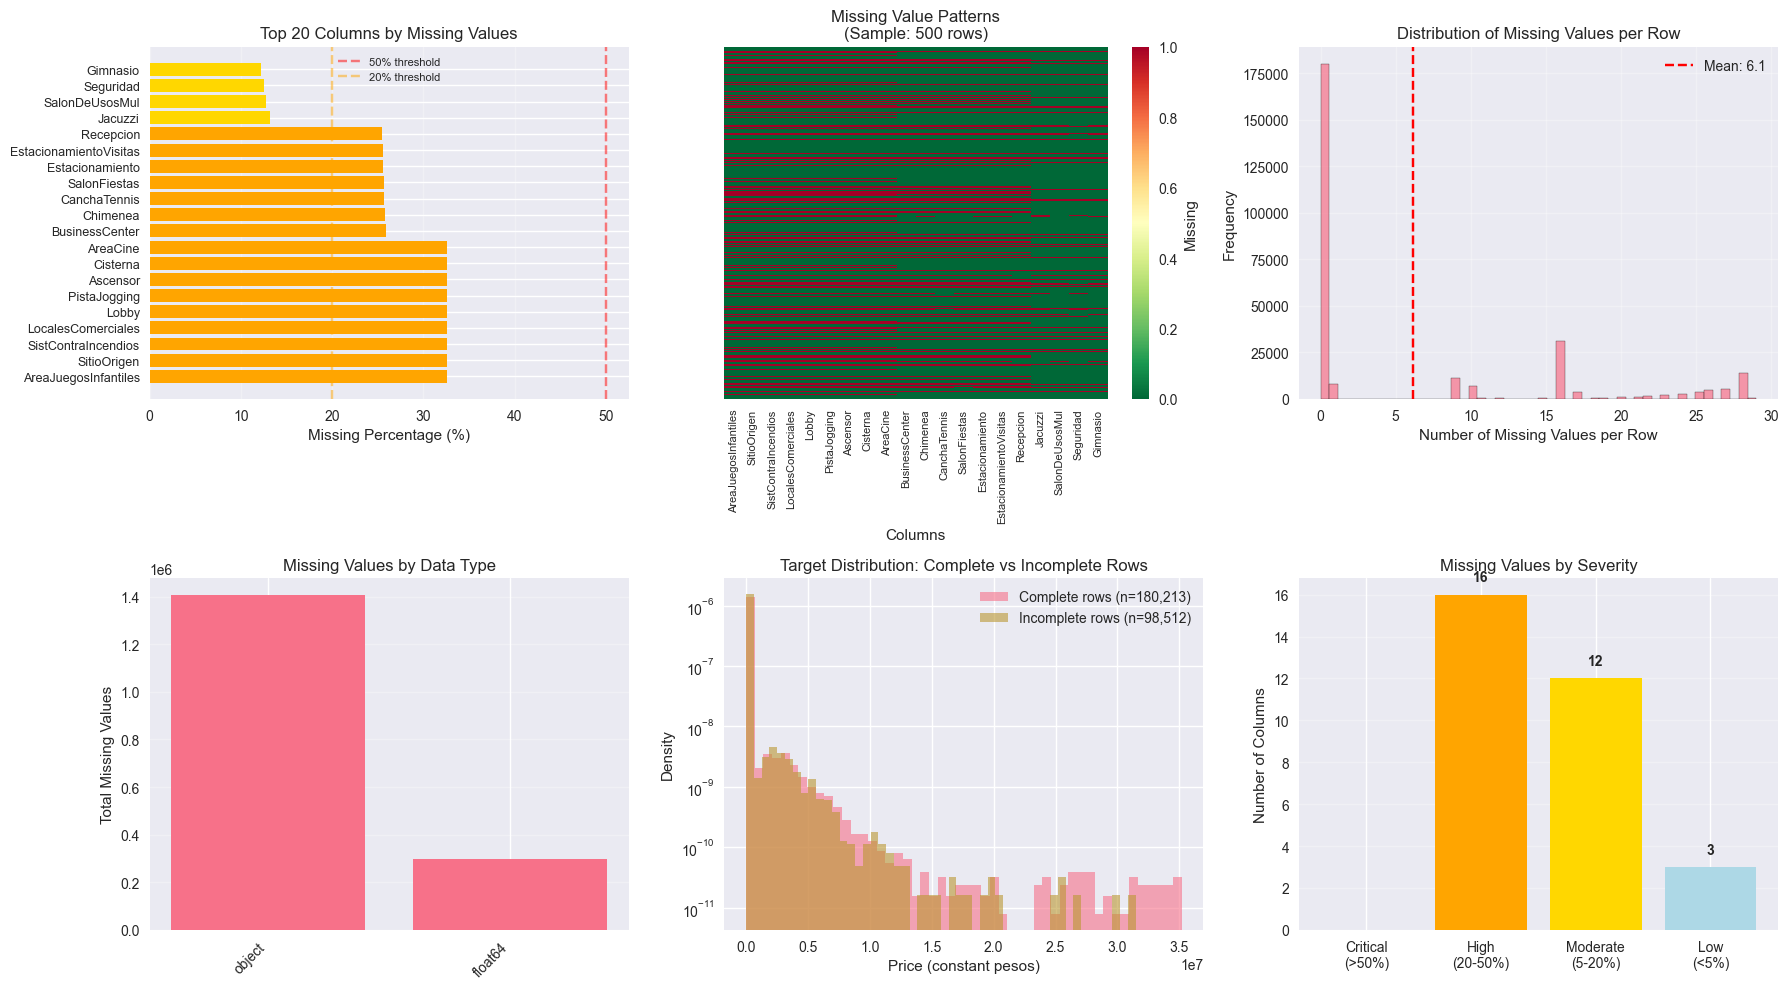

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ============================================================================
# MISSING VALUES ANALYSIS
# ============================================================================

def analyze_missing_values(df, target_col='precio_pesos_constantes'):
    """
    Comprehensive missing values analysis for rental price prediction dataset.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataset
    target_col : str
        Name of target variable column
    """
    
    # Calculate missing values
    missing_stats = pd.DataFrame({
        'column': df.columns,
        'missing_count': df.isnull().sum(),
        'missing_pct': (df.isnull().sum() / len(df)) * 100,
        'dtype': df.dtypes
    }).sort_values('missing_pct', ascending=False)
    
    # Filter only columns with missing values
    missing_stats = missing_stats[missing_stats['missing_count'] > 0].reset_index(drop=True)
    
    # Overall statistics
    print("=" * 80)
    print("MISSING VALUES SUMMARY")
    print("=" * 80)
    print(f"Total rows: {len(df):,}")
    print(f"Total columns: {len(df.columns)}")
    print(f"Columns with missing values: {len(missing_stats)}/{len(df.columns)}")
    print(f"Total missing cells: {df.isnull().sum().sum():,}")
    print(f"Overall missing percentage: {(df.isnull().sum().sum() / (len(df) * len(df.columns))) * 100:.2f}%")
    print()
    
    # Detailed missing values table
    if len(missing_stats) > 0:
        print("COLUMNS WITH MISSING VALUES:")
        print("-" * 80)
        print(missing_stats.to_string(index=False))
        print()
        
        # Categorize by severity
        critical = missing_stats[missing_stats['missing_pct'] > 50]
        high = missing_stats[(missing_stats['missing_pct'] > 20) & (missing_stats['missing_pct'] <= 50)]
        moderate = missing_stats[(missing_stats['missing_pct'] > 5) & (missing_stats['missing_pct'] <= 20)]
        low = missing_stats[missing_stats['missing_pct'] <= 5]
        
        print("SEVERITY CLASSIFICATION:")
        print("-" * 80)
        if len(critical) > 0:
            print(f"CRITICAL (>50%): {len(critical)} columns")
            print(f"  {list(critical['column'].values)}")
        if len(high) > 0:
            print(f"HIGH (20-50%): {len(high)} columns")
            print(f"  {list(high['column'].values)}")
        if len(moderate) > 0:
            print(f"MODERATE (5-20%): {len(moderate)} columns")
            print(f"  {list(moderate['column'].values)}")
        if len(low) > 0:
            print(f"LOW (<5%): {len(low)} columns")
            print(f"  {list(low['column'].values)}")
        print()
        
        # Check if target variable has missing values
        if target_col in missing_stats['column'].values:
            target_missing = missing_stats[missing_stats['column'] == target_col]['missing_pct'].iloc[0]
            print(f"WARNING: Target variable '{target_col}' has {target_missing:.2f}% missing values")
            print()
    else:
        print("No missing values found in dataset!")
        print()
    
    # Visualizations
    if len(missing_stats) > 0:
        create_missing_visualizations(df, missing_stats, target_col)
    
    return missing_stats


def create_missing_visualizations(df, missing_stats, target_col):
    """Create visualizations for missing value analysis."""
    
    fig = plt.figure(figsize=(18, 10))
    
    # 1. Bar plot of missing percentages (top 20)
    ax1 = plt.subplot(2, 3, 1)
    top_missing = missing_stats.head(20)
    colors = ['red' if x > 50 else 'orange' if x > 20 else 'gold' if x > 5 else 'lightblue' 
              for x in top_missing['missing_pct']]
    
    plt.barh(range(len(top_missing)), top_missing['missing_pct'], color=colors)
    plt.yticks(range(len(top_missing)), top_missing['column'], fontsize=9)
    plt.xlabel('Missing Percentage (%)')
    plt.title('Top 20 Columns by Missing Values')
    plt.axvline(x=50, color='red', linestyle='--', alpha=0.5, label='50% threshold')
    plt.axvline(x=20, color='orange', linestyle='--', alpha=0.5, label='20% threshold')
    plt.legend(fontsize=8)
    plt.grid(axis='x', alpha=0.3)
    
    # 2. Missing values heatmap (sample)
    ax2 = plt.subplot(2, 3, 2)
    sample_size = min(500, len(df))
    df_sample = df.sample(n=sample_size, random_state=42)
    missing_cols = missing_stats['column'].head(20).tolist()
    
    if len(missing_cols) > 0:
        sns.heatmap(df_sample[missing_cols].isnull(), 
                   cbar=True, 
                   yticklabels=False,
                   cmap='RdYlGn_r',
                   cbar_kws={'label': 'Missing'})
        plt.title(f'Missing Value Patterns\n(Sample: {sample_size} rows)')
        plt.xlabel('Columns')
        plt.xticks(rotation=90, fontsize=8)
    
    # 3. Distribution of missing values per row
    ax3 = plt.subplot(2, 3, 3)
    missing_per_row = df.isnull().sum(axis=1)
    plt.hist(missing_per_row, bins=50, edgecolor='black', alpha=0.7)
    plt.xlabel('Number of Missing Values per Row')
    plt.ylabel('Frequency')
    plt.title('Distribution of Missing Values per Row')
    plt.axvline(missing_per_row.mean(), color='red', linestyle='--', 
                label=f'Mean: {missing_per_row.mean():.1f}')
    plt.legend()
    plt.grid(alpha=0.3)
    
    # 4. Missing by data type
    ax4 = plt.subplot(2, 3, 4)
    missing_by_dtype = missing_stats.groupby('dtype')['missing_count'].sum().sort_values(ascending=False)
    
    if len(missing_by_dtype) > 0:
        plt.bar(range(len(missing_by_dtype)), missing_by_dtype.values)
        plt.xticks(range(len(missing_by_dtype)), 
                  [str(dt) for dt in missing_by_dtype.index], 
                  rotation=45, ha='right')
        plt.ylabel('Total Missing Values')
        plt.title('Missing Values by Data Type')
        plt.grid(axis='y', alpha=0.3)
    
    # 5. Correlation with target variable
    ax5 = plt.subplot(2, 3, 5)
    if target_col in df.columns and df[target_col].notnull().any():
        # Compare target distribution for complete vs incomplete rows
        complete_mask = ~df.isnull().any(axis=1)
        
        data_complete = df[complete_mask & df[target_col].notnull()][target_col]
        data_incomplete = df[~complete_mask & df[target_col].notnull()][target_col]
        
        if len(data_complete) > 0 and len(data_incomplete) > 0:
            plt.hist(data_complete, bins=50, alpha=0.6, label=f'Complete rows (n={len(data_complete):,})', density=True)
            plt.hist(data_incomplete, bins=50, alpha=0.6, label=f'Incomplete rows (n={len(data_incomplete):,})', density=True)
            plt.xlabel('Price (constant pesos)')
            plt.ylabel('Density')
            plt.title('Target Distribution: Complete vs Incomplete Rows')
            plt.legend()
            plt.yscale('log')
    
    # 6. Severity summary
    ax6 = plt.subplot(2, 3, 6)
    severity_counts = {
        'Critical\n(>50%)': len(missing_stats[missing_stats['missing_pct'] > 50]),
        'High\n(20-50%)': len(missing_stats[(missing_stats['missing_pct'] > 20) & (missing_stats['missing_pct'] <= 50)]),
        'Moderate\n(5-20%)': len(missing_stats[(missing_stats['missing_pct'] > 5) & (missing_stats['missing_pct'] <= 20)]),
        'Low\n(<5%)': len(missing_stats[missing_stats['missing_pct'] <= 5])
    }
    
    colors_severity = ['red', 'orange', 'gold', 'lightblue']
    plt.bar(severity_counts.keys(), severity_counts.values(), color=colors_severity)
    plt.ylabel('Number of Columns')
    plt.title('Missing Values by Severity')
    plt.grid(axis='y', alpha=0.3)
    
    # Add counts on bars
    for i, (k, v) in enumerate(severity_counts.items()):
        if v > 0:
            plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

# Usage
missing_analysis = analyze_missing_values(df)

### 2.4 Detección de Outliers


OUTLIER DETECTION ANALYSIS
Method: IQR (Interquartile Range) with 1.5x multiplier
Total rows: 278,725


CORE FEATURES
----------------------------------------------------------------------------------------------------
precio_pesos_constantes        | Outliers: 43,699 (15.68%) [CRITICAL]
                               | Range: [43, 35,187,595]
                               | Normal: [-11,836, 37,242]

STotalM2                       | Outliers: 29,459 (10.57%) [HIGH]
                               | Range: [0, 332,155,546]
                               | Normal: [-19, 133]

SConstrM2                      | Outliers: 27,344 ( 9.81%) [MODERATE]
                               | Range: [0, 2,287,862,444]
                               | Normal: [-15, 121]


PROPERTY ATTRIBUTES
----------------------------------------------------------------------------------------------------
Dormitorios                    | Outliers: 8,542 ( 3.06%) [LOW]
                               | Range: [0, 99]
  

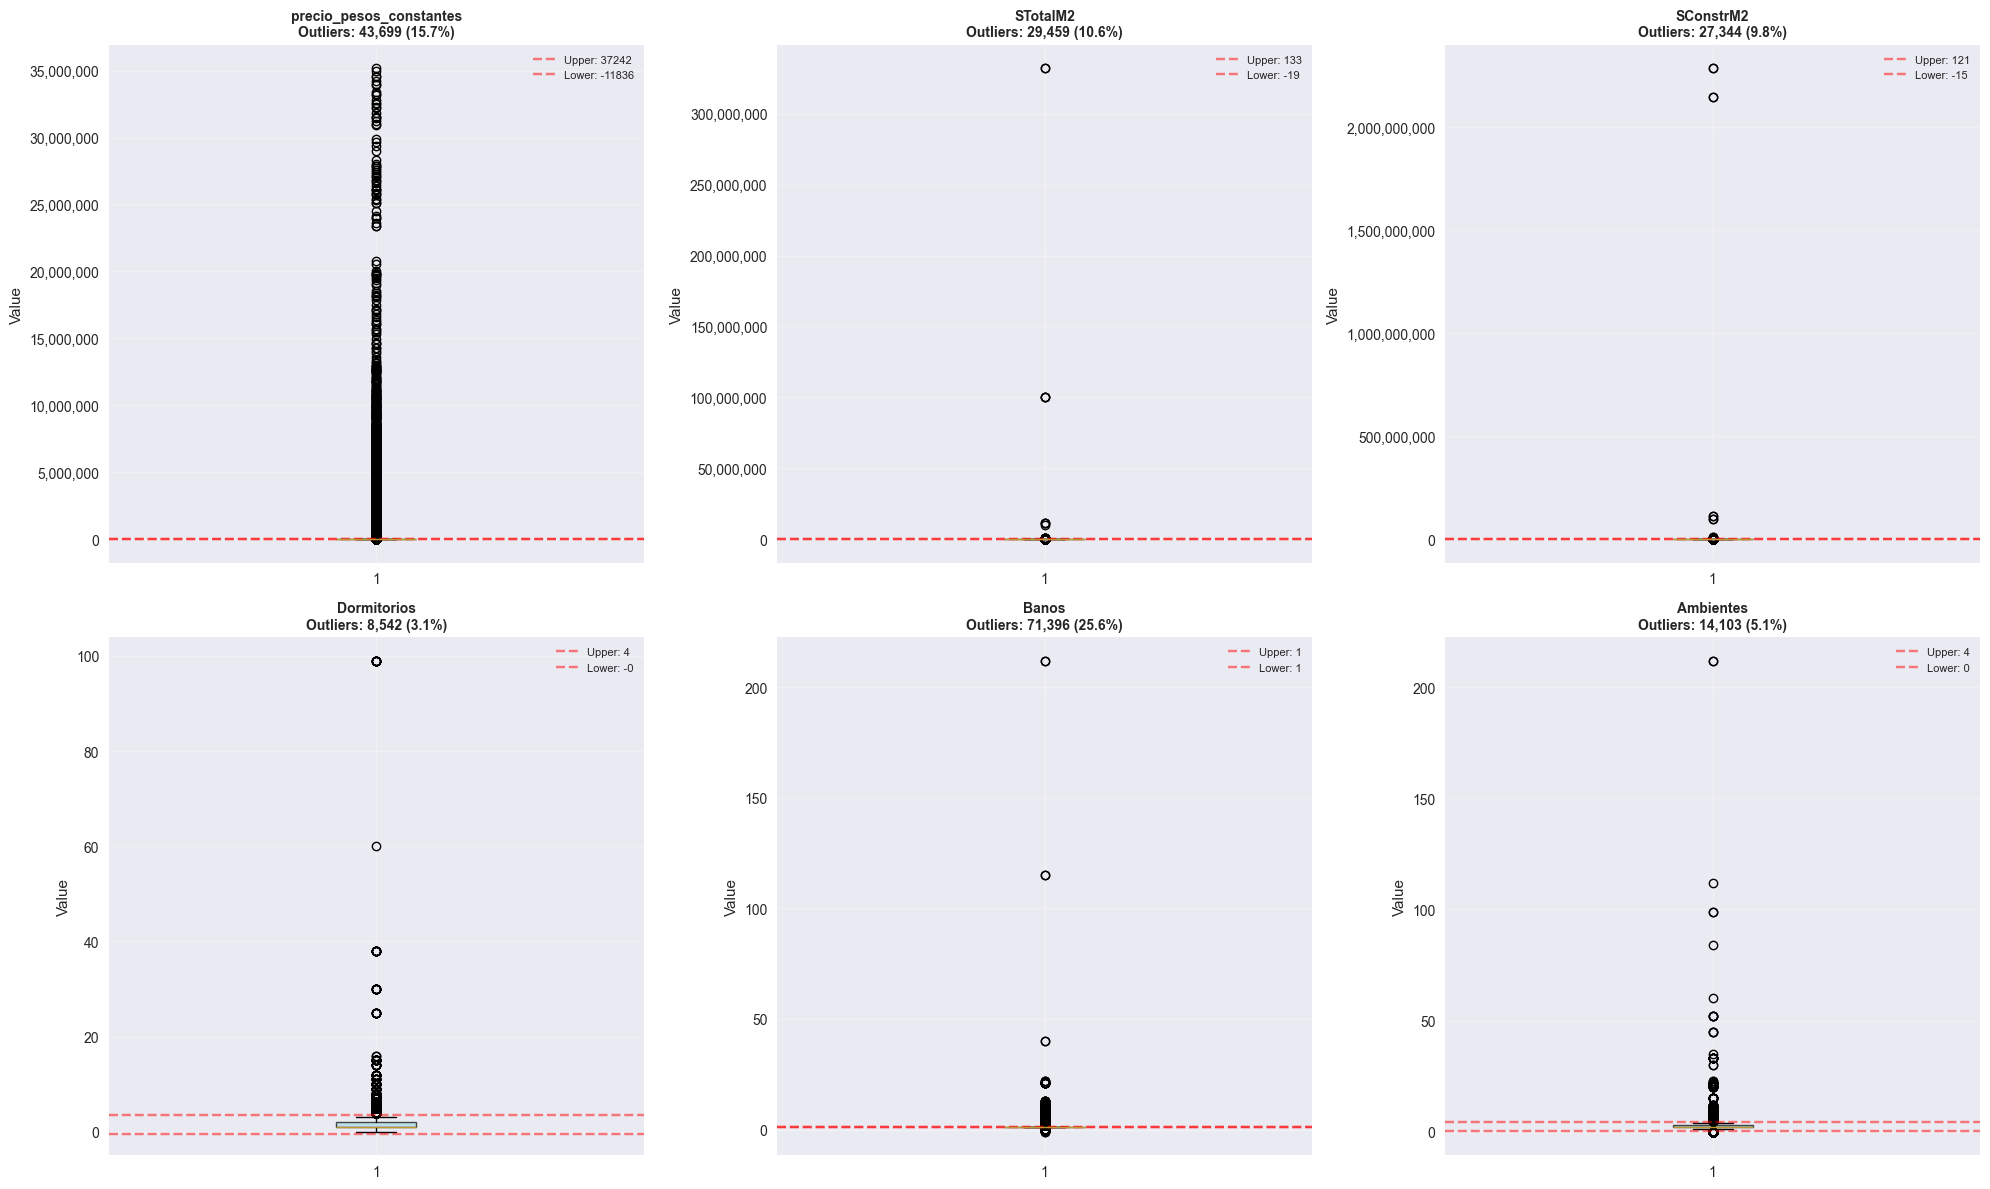

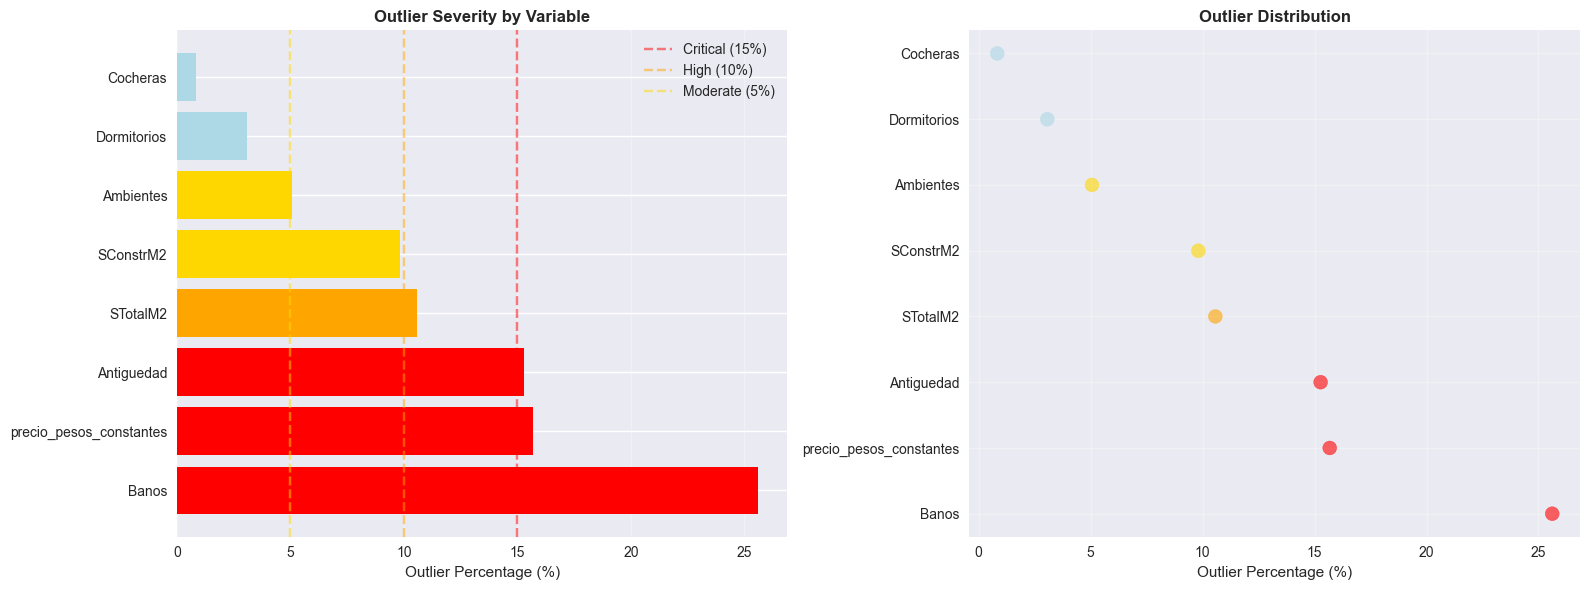


SEVERITY:
----------------------------------------------------------------------------------------------------

1. CRITICAL (3 variables - >15% outliers):
   - precio_pesos_constantes: 15.7% outliers
   - Banos: 25.6% outliers
   - Antiguedad: 15.3% outliers

2. HIGH (1 variables - 10-15% outliers):
   - STotalM2: 10.6% outliers

3. MODERATE (2 variables - 5-10% outliers):
   - SConstrM2: 9.8% outliers
   - Ambientes: 5.1% outliers

4. LOW (2 variables - <5% outliers):
   - Dormitorios: 3.1% outliers
   - Cocheras: 0.8% outliers


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# ============================================================================
# OUTLIER DETECTION ANALYSIS
# ============================================================================

def detect_outliers_iqr(series, multiplier=1.5):
    """
    Detect outliers using IQR method.
    
    Parameters:
    -----------
    series : pandas.Series
        Numeric data series
    multiplier : float
        IQR multiplier (1.5 = standard, 3.0 = extreme outliers only)
    
    Returns:
    --------
    dict with outlier statistics
    """
    # Clean data
    clean_data = pd.to_numeric(series, errors='coerce').dropna()
    
    if len(clean_data) == 0:
        return None
    
    Q1 = clean_data.quantile(0.25)
    Q3 = clean_data.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    
    outlier_mask = (clean_data < lower_bound) | (clean_data > upper_bound)
    outlier_count = outlier_mask.sum()
    
    return {
        'q1': Q1,
        'q3': Q3,
        'iqr': IQR,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'outlier_count': outlier_count,
        'outlier_pct': (outlier_count / len(clean_data)) * 100,
        'min_value': clean_data.min(),
        'max_value': clean_data.max(),
        'outlier_indices': clean_data[outlier_mask].index.tolist()
    }


def detect_outliers_zscore(series, threshold=3):
    """Detect outliers using Z-score method."""
    clean_data = pd.to_numeric(series, errors='coerce').dropna()
    
    if len(clean_data) == 0:
        return None
    
    z_scores = np.abs(stats.zscore(clean_data))
    outlier_mask = z_scores > threshold
    
    return {
        'outlier_count': outlier_mask.sum(),
        'outlier_pct': (outlier_mask.sum() / len(clean_data)) * 100,
        'outlier_indices': clean_data[outlier_mask].index.tolist()
    }


def analyze_outliers(df, target_col='precio_pesos_constantes'):
    """
    Comprehensive outlier analysis for rental price prediction.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataset
    target_col : str
        Target variable for rental prices
    """
    
    # Define numeric columns to analyze
    numeric_cols = {
        'Core Features': ['precio_pesos_constantes', 'STotalM2', 'SConstrM2'],
        'Property Attributes': ['Dormitorios', 'Banos', 'Ambientes', 'Cocheras'],
        'Building Info': ['Antiguedad']
    }
    
    all_numeric_cols = [col for cols in numeric_cols.values() for col in cols]
    all_numeric_cols = [col for col in all_numeric_cols if col in df.columns]
    
    print("=" * 100)
    print("OUTLIER DETECTION ANALYSIS")
    print("=" * 100)
    print(f"Method: IQR (Interquartile Range) with 1.5x multiplier")
    print(f"Total rows: {len(df):,}")
    print()
    
    # Analyze each column
    results = []
    
    for category, cols in numeric_cols.items():
        print(f"\n{category.upper()}")
        print("-" * 100)
        
        for col in cols:
            if col not in df.columns:
                continue
            
            # Get outlier stats
            stats_iqr = detect_outliers_iqr(df[col])
            
            if stats_iqr is None:
                print(f"{col:30} | No numeric data available")
                continue
            
            # Store results
            results.append({
                'variable': col,
                'category': category,
                'outlier_count': stats_iqr['outlier_count'],
                'outlier_pct': stats_iqr['outlier_pct'],
                'min_value': stats_iqr['min_value'],
                'max_value': stats_iqr['max_value'],
                'lower_bound': stats_iqr['lower_bound'],
                'upper_bound': stats_iqr['upper_bound'],
                'iqr': stats_iqr['iqr']
            })
            
            # Print formatted results
            severity = get_severity_label(stats_iqr['outlier_pct'])
            print(f"{col:30} | Outliers: {stats_iqr['outlier_count']:5,} ({stats_iqr['outlier_pct']:5.2f}%) {severity}")
            print(f"{' ':30} | Range: [{stats_iqr['min_value']:,.0f}, {stats_iqr['max_value']:,.0f}]")
            print(f"{' ':30} | Normal: [{stats_iqr['lower_bound']:,.0f}, {stats_iqr['upper_bound']:,.0f}]")
            print()
    
    # Summary table
    results_df = pd.DataFrame(results)
    
    if len(results_df) > 0:
        print("\n" + "=" * 100)
        print("OUTLIER SUMMARY TABLE")
        print("=" * 100)
        
        summary_display = results_df[['variable', 'outlier_count', 'outlier_pct', 
                                       'min_value', 'max_value']].copy()
        summary_display['severity'] = summary_display['outlier_pct'].apply(get_severity_label)
        
        print(summary_display.to_string(index=False, float_format=lambda x: f'{x:,.2f}'))
    
    # Detailed investigation of critical outliers
    print("\n" + "=" * 100)
    print("CRITICAL OUTLIERS INVESTIGATION")
    print("=" * 100)
    
    investigate_price_outliers(df, target_col)
    investigate_size_outliers(df)
    investigate_room_outliers(df)
    
    # Visualizations
    create_outlier_visualizations(df, all_numeric_cols, results_df)
    
    # Recommendations
    print_outlier_recommendations(results_df, df)
    
    return results_df


def get_severity_label(pct):
    """Return severity label based on outlier percentage."""
    if pct > 15:
        return "[CRITICAL]"
    elif pct > 10:
        return "[HIGH]"
    elif pct > 5:
        return "[MODERATE]"
    else:
        return "[LOW]"


def investigate_price_outliers(df, target_col):
    """Detailed investigation of price outliers."""
    if target_col not in df.columns:
        return
    
    print("\n1. RENTAL PRICE OUTLIERS")
    print("-" * 100)
    
    prices = df[target_col].dropna()
    
    # Define extreme thresholds based on domain knowledge
    thresholds = {
        'Very High': 200000,  # > 200k pesos
        'High': 100000,       # > 100k pesos
        'Suspiciously High': 500000  # Likely data errors
    }
    
    for label, threshold in thresholds.items():
        count = (prices > threshold).sum()
        pct = (count / len(prices)) * 100
        print(f"   {label} (>{threshold:,}): {count:,} properties ({pct:.2f}%)")
    
    # Show extreme examples
    extreme = df[df[target_col] > thresholds['High']].nlargest(5, target_col)
    
    if len(extreme) > 0:
        print("\n   Top 5 Most Expensive Properties:")
        display_cols = [target_col, 'STotalM2', 'SConstrM2', 'Dormitorios', 
                       'Banos', 'ITE_ADD_CITY_NAME', 'ITE_ADD_NEIGHBORHOOD_NAME']
        display_cols = [col for col in display_cols if col in df.columns]
        print(extreme[display_cols].to_string(index=False))


def investigate_size_outliers(df):
    """Detailed investigation of size outliers."""
    print("\n2. PROPERTY SIZE OUTLIERS")
    print("-" * 100)
    
    size_cols = ['STotalM2', 'SConstrM2']
    
    for col in size_cols:
        if col not in df.columns:
            continue
        
        sizes = df[col].dropna()
        
        # Domain-specific thresholds
        thresholds = {
            'Very Large': 300,    # > 300m²
            'Extremely Large': 500,  # > 500m²
            'Suspicious': 1000    # Likely errors
        }
        
        print(f"\n   {col}:")
        for label, threshold in thresholds.items():
            count = (sizes > threshold).sum()
            pct = (count / len(sizes)) * 100
            print(f"      {label} (>{threshold}m²): {count:,} properties ({pct:.2f}%)")
        
        # Show examples
        extreme = df[df[col] > thresholds['Very Large']].nlargest(3, col)
        if len(extreme) > 0:
            print(f"\n   Top 3 Largest by {col}:")
            display_cols = [col, 'precio_pesos_constantes', 'Dormitorios', 'ITE_ADD_CITY_NAME']
            display_cols = [c for c in display_cols if c in df.columns]
            print(extreme[display_cols].to_string(index=False))


def investigate_room_outliers(df):
    """Detailed investigation of room count outliers."""
    print("\n3. ROOM COUNT OUTLIERS")
    print("-" * 100)
    
    room_cols = ['Dormitorios', 'Banos', 'Ambientes']
    
    for col in room_cols:
        if col not in df.columns:
            continue
        
        rooms = df[col].dropna()
        
        print(f"\n   {col}:")
        print(f"      Range: {rooms.min():.0f} to {rooms.max():.0f}")
        print(f"      Properties with >6: {(rooms > 6).sum():,} ({(rooms > 6).sum() / len(rooms) * 100:.2f}%)")
        
        # Value counts for high values
        high_values = rooms[rooms > 6].value_counts().sort_index()
        if len(high_values) > 0:
            print(f"      Distribution of high values:")
            for val, count in high_values.items():
                print(f"         {val:.0f} {col}: {count:,} properties")


def create_outlier_visualizations(df, numeric_cols, results_df):
    """Create comprehensive outlier visualizations."""
    
    # Filter to available columns
    available_cols = [col for col in numeric_cols if col in df.columns]
    
    if len(available_cols) == 0:
        return
    
    n_cols = min(len(available_cols), 6)
    fig = plt.figure(figsize=(20, 12))
    
    for idx, col in enumerate(available_cols[:6], 1):
        # Box plot
        ax = plt.subplot(2, 3, idx)
        
        data = pd.to_numeric(df[col], errors='coerce').dropna()
        
        if len(data) == 0:
            continue
        
        # Create box plot
        bp = ax.boxplot(data, vert=True, patch_artist=True)
        bp['boxes'][0].set_facecolor('lightblue')
        bp['boxes'][0].set_alpha(0.7)
        
        # Add outlier statistics
        stats_iqr = detect_outliers_iqr(df[col])
        if stats_iqr:
            ax.axhline(y=stats_iqr['upper_bound'], color='r', linestyle='--', 
                      alpha=0.5, label=f'Upper: {stats_iqr["upper_bound"]:.0f}')
            ax.axhline(y=stats_iqr['lower_bound'], color='r', linestyle='--', 
                      alpha=0.5, label=f'Lower: {stats_iqr["lower_bound"]:.0f}')
            
            title = f'{col}\nOutliers: {stats_iqr["outlier_count"]:,} ({stats_iqr["outlier_pct"]:.1f}%)'
            ax.set_title(title, fontsize=10, fontweight='bold')
        else:
            ax.set_title(col, fontsize=10, fontweight='bold')
        
        ax.set_ylabel('Value')
        ax.legend(fontsize=8)
        ax.grid(alpha=0.3)
        
        # Format y-axis
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))
    
    plt.tight_layout()
    plt.show()
    
    # Second figure: Outlier severity comparison
    if results_df is not None and len(results_df) > 0:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
        
        # Bar plot of outlier percentages
        results_sorted = results_df.sort_values('outlier_pct', ascending=False)
        colors = [get_severity_color(pct) for pct in results_sorted['outlier_pct']]
        
        ax1.barh(range(len(results_sorted)), results_sorted['outlier_pct'], color=colors)
        ax1.set_yticks(range(len(results_sorted)))
        ax1.set_yticklabels(results_sorted['variable'])
        ax1.set_xlabel('Outlier Percentage (%)')
        ax1.set_title('Outlier Severity by Variable', fontweight='bold')
        ax1.axvline(x=15, color='red', linestyle='--', alpha=0.5, label='Critical (15%)')
        ax1.axvline(x=10, color='orange', linestyle='--', alpha=0.5, label='High (10%)')
        ax1.axvline(x=5, color='gold', linestyle='--', alpha=0.5, label='Moderate (5%)')
        ax1.legend()
        ax1.grid(axis='x', alpha=0.3)
        
        # Scatter plot: outlier % vs variable importance
        ax2.scatter(results_sorted['outlier_pct'], range(len(results_sorted)), 
                   c=colors, s=100, alpha=0.6)
        ax2.set_yticks(range(len(results_sorted)))
        ax2.set_yticklabels(results_sorted['variable'])
        ax2.set_xlabel('Outlier Percentage (%)')
        ax2.set_title('Outlier Distribution', fontweight='bold')
        ax2.grid(alpha=0.3)
        
        plt.tight_layout()
        plt.show()


def get_severity_color(pct):
    """Return color based on outlier percentage."""
    if pct > 15:
        return 'red'
    elif pct > 10:
        return 'orange'
    elif pct > 5:
        return 'gold'
    else:
        return 'lightblue'


def print_outlier_recommendations(results_df, df):
    if results_df is None or len(results_df) == 0:
        print("No outliers detected.")
        return
    
    critical = results_df[results_df['outlier_pct'] > 15]
    high = results_df[(results_df['outlier_pct'] > 10) & (results_df['outlier_pct'] <= 15)]
    moderate = results_df[(results_df['outlier_pct'] > 5) & (results_df['outlier_pct'] <= 10)]
    low = results_df[results_df['outlier_pct'] <= 5]
    
    print("\nSEVERITY:")
    print("-" * 100)
    
    if len(critical) > 0:
        print(f"\n1. CRITICAL ({len(critical)} variables - >15% outliers):")
        for _, row in critical.iterrows():
            print(f"   - {row['variable']}: {row['outlier_pct']:.1f}% outliers")
    
    if len(high) > 0:
        print(f"\n2. HIGH ({len(high)} variables - 10-15% outliers):")
        for _, row in high.iterrows():
            print(f"   - {row['variable']}: {row['outlier_pct']:.1f}% outliers")
    
    if len(moderate) > 0:
        print(f"\n3. MODERATE ({len(moderate)} variables - 5-10% outliers):")
        for _, row in moderate.iterrows():
            print(f"   - {row['variable']}: {row['outlier_pct']:.1f}% outliers")
    
    if len(low) > 0:
        print(f"\n4. LOW ({len(low)} variables - <5% outliers):")
        for _, row in low.iterrows():
            print(f"   - {row['variable']}: {row['outlier_pct']:.1f}% outliers")

# Usage
outlier_results = analyze_outliers(df)

### 2.5 Visualizaciones Iniciales


COMPREHENSIVE DISTRIBUTION ANALYSIS
Analyzing 8 variables | Dataset size: 278,725 rows

STATISTICAL SUMMARY:
----------------------------------------------------------------------------------------------------
               Variable   Count   Mean Median       Std Min           Max   Skew Missing%
precio_pesos_constantes 278,725 80,886  9,169   667,532  43    35,187,595  24.51      0.0
               STotalM2 278,705  3,740     50   949,244   0   332,155,546 320.05      0.0
              SConstrM2 278,705 33,568     46 8,415,217   0 2,287,862,444 263.48      0.0
            Dormitorios 278,725      1      1         1   0            99  22.36      0.0
                  Banos 278,725      1      1         1  -1           212  74.51      0.0
              Ambientes 278,725      2      2         1   0           212  32.17      0.0
             Antiguedad 120,051     13      0        86   0         9,999  52.96      9.3
               Cocheras 278,725      0      0         2  -4           

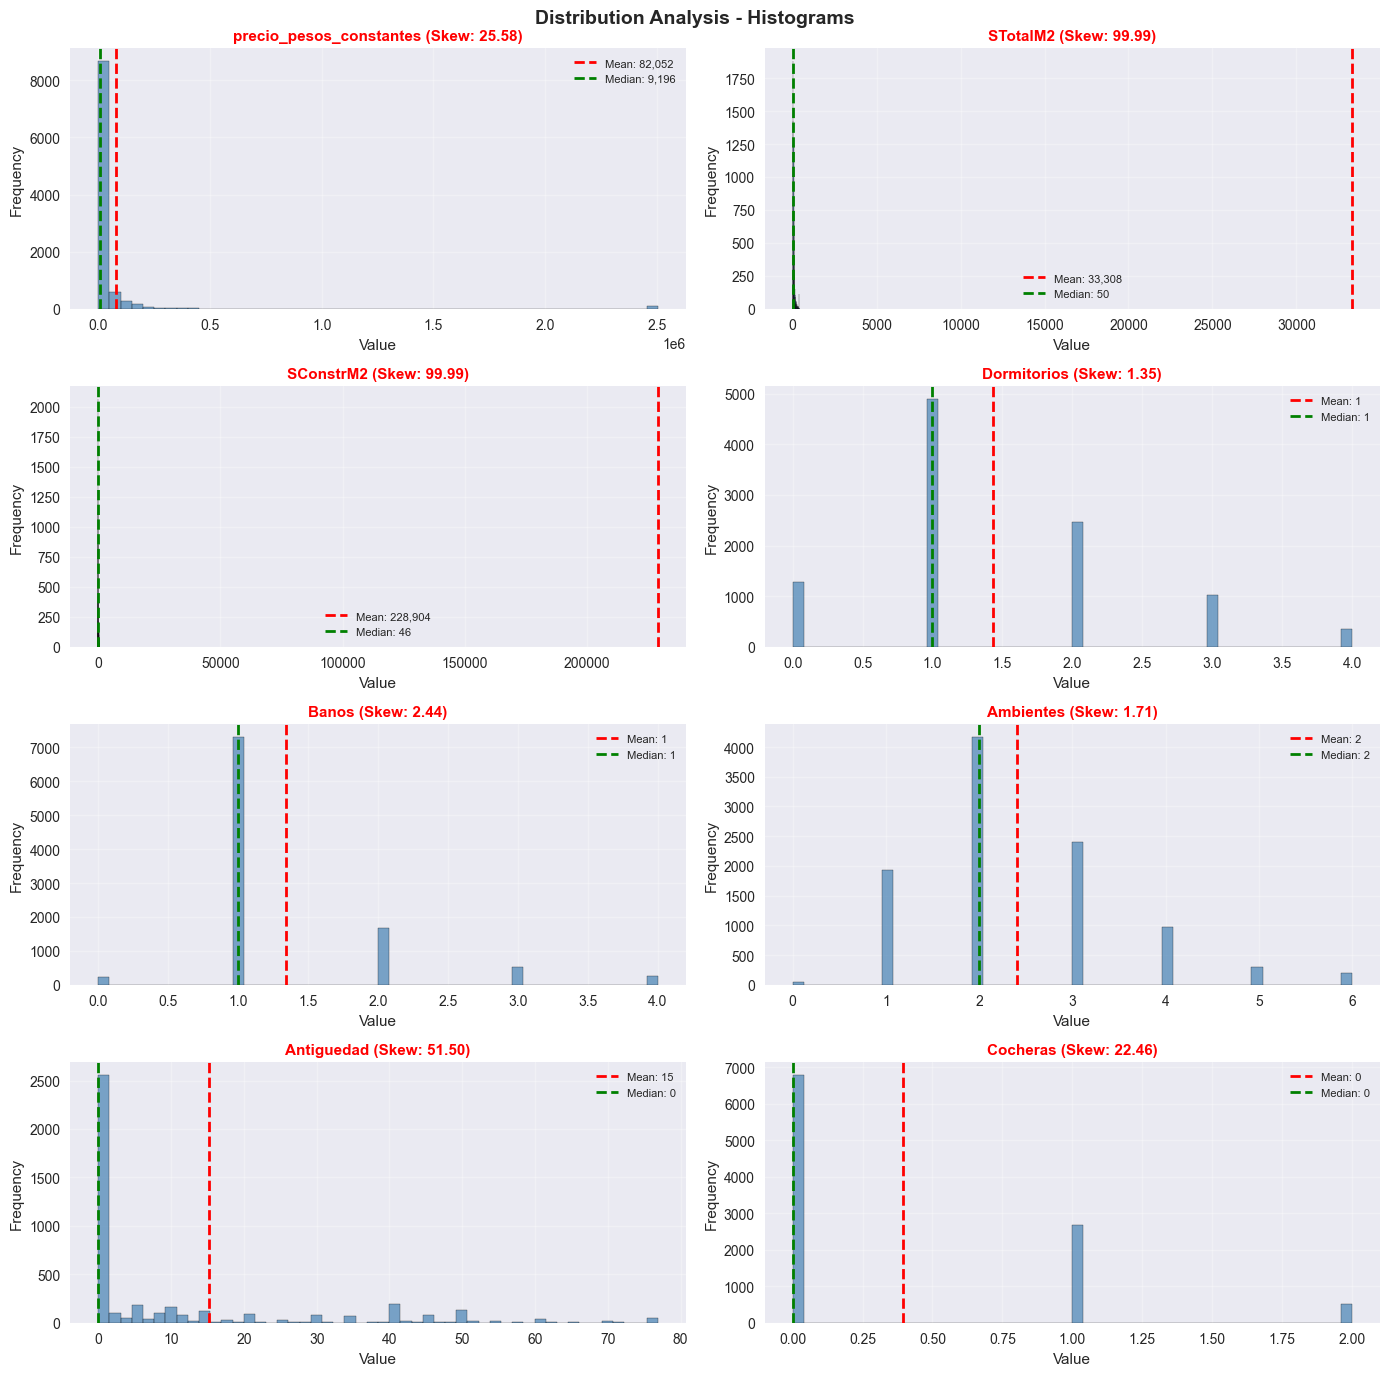

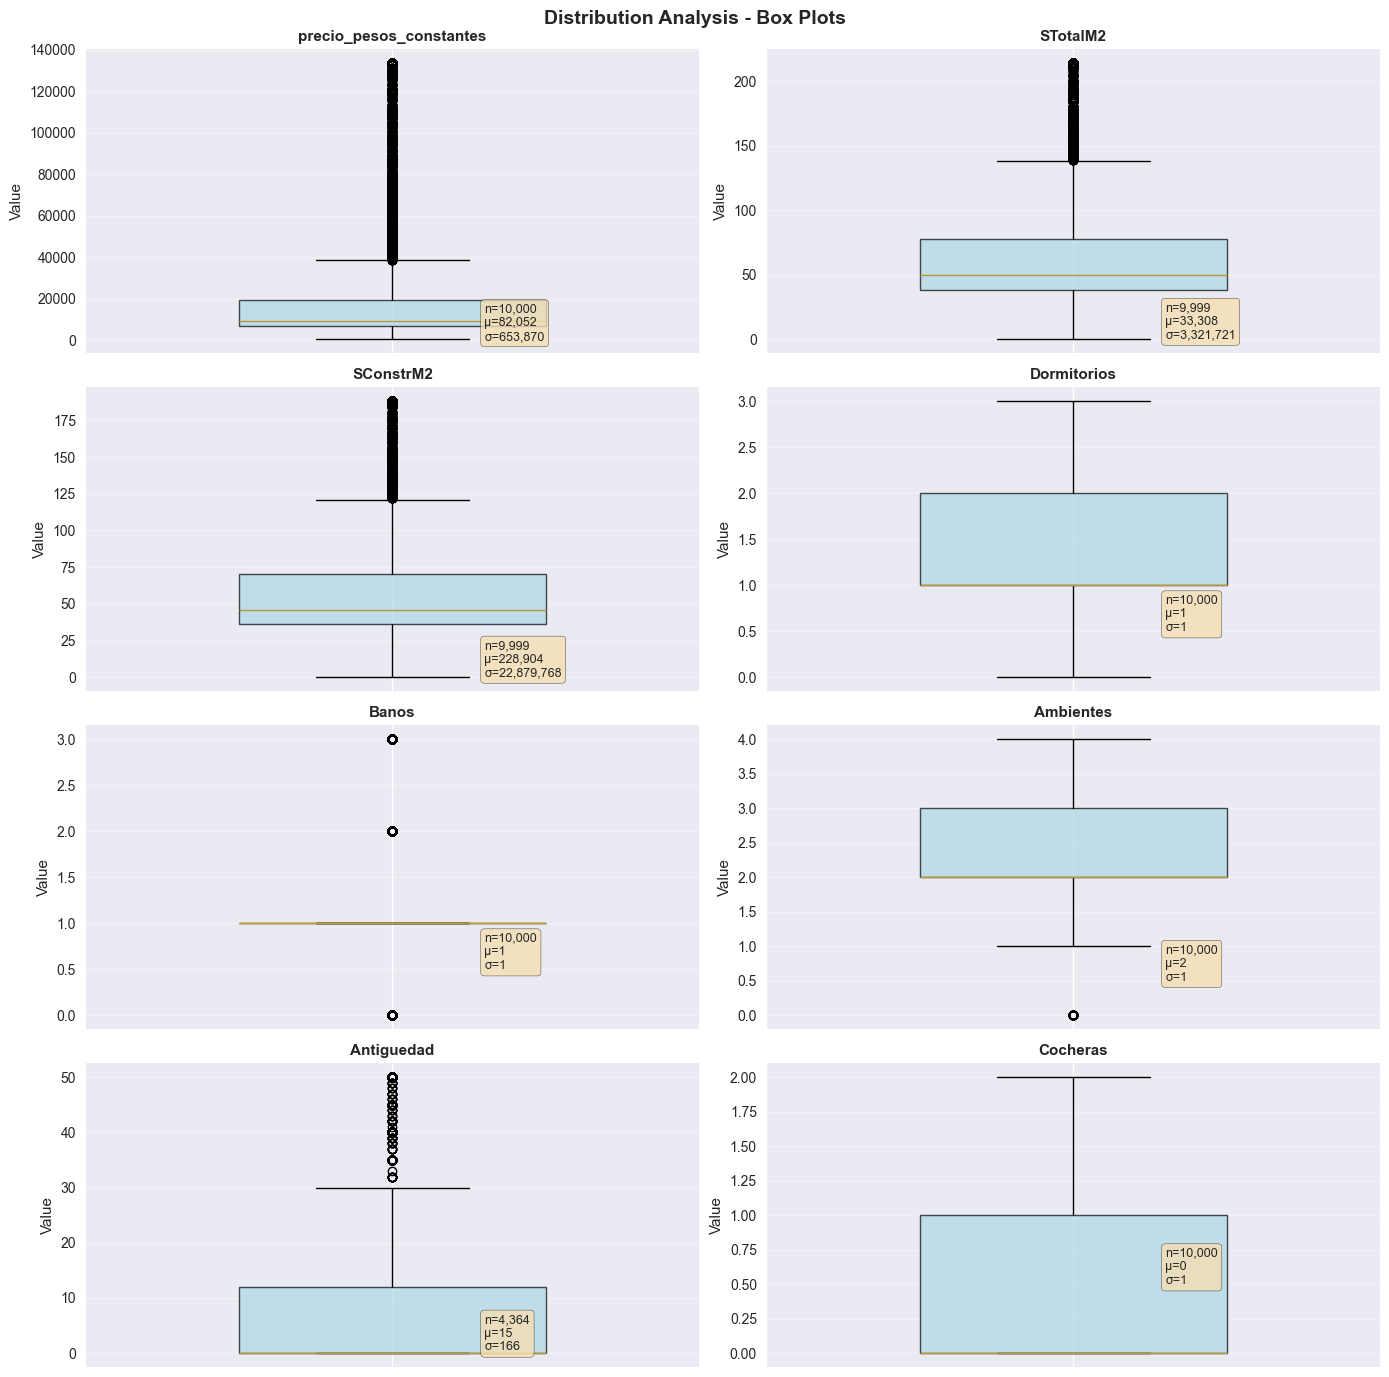


CORRELATION ANALYSIS:
----------------------------------------------------------------------------------------------------


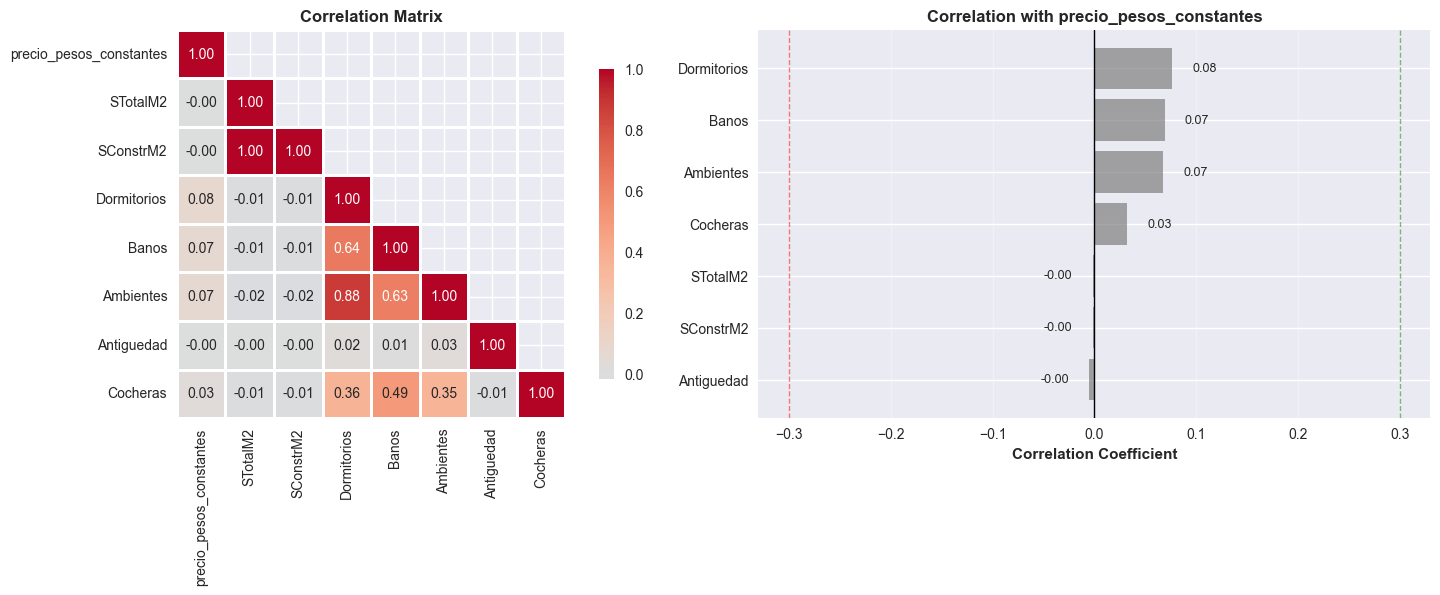


CORRELATION INSIGHTS:
----------------------------------------------------------------------------------------------------

Weak Correlations (<0.1) - Consider removing:
  STotalM2: -0.002
  SConstrM2: -0.002
  Dormitorios: 0.076
  Banos: 0.069
  Ambientes: 0.067
  Antiguedad: -0.005
  Cocheras: 0.032

WARNING - Multicollinearity detected (|r| > 0.8):
  STotalM2 <-> SConstrM2: 1.000
  Dormitorios <-> Ambientes: 0.880


TARGET VARIABLE ANALYSIS:
----------------------------------------------------------------------------------------------------


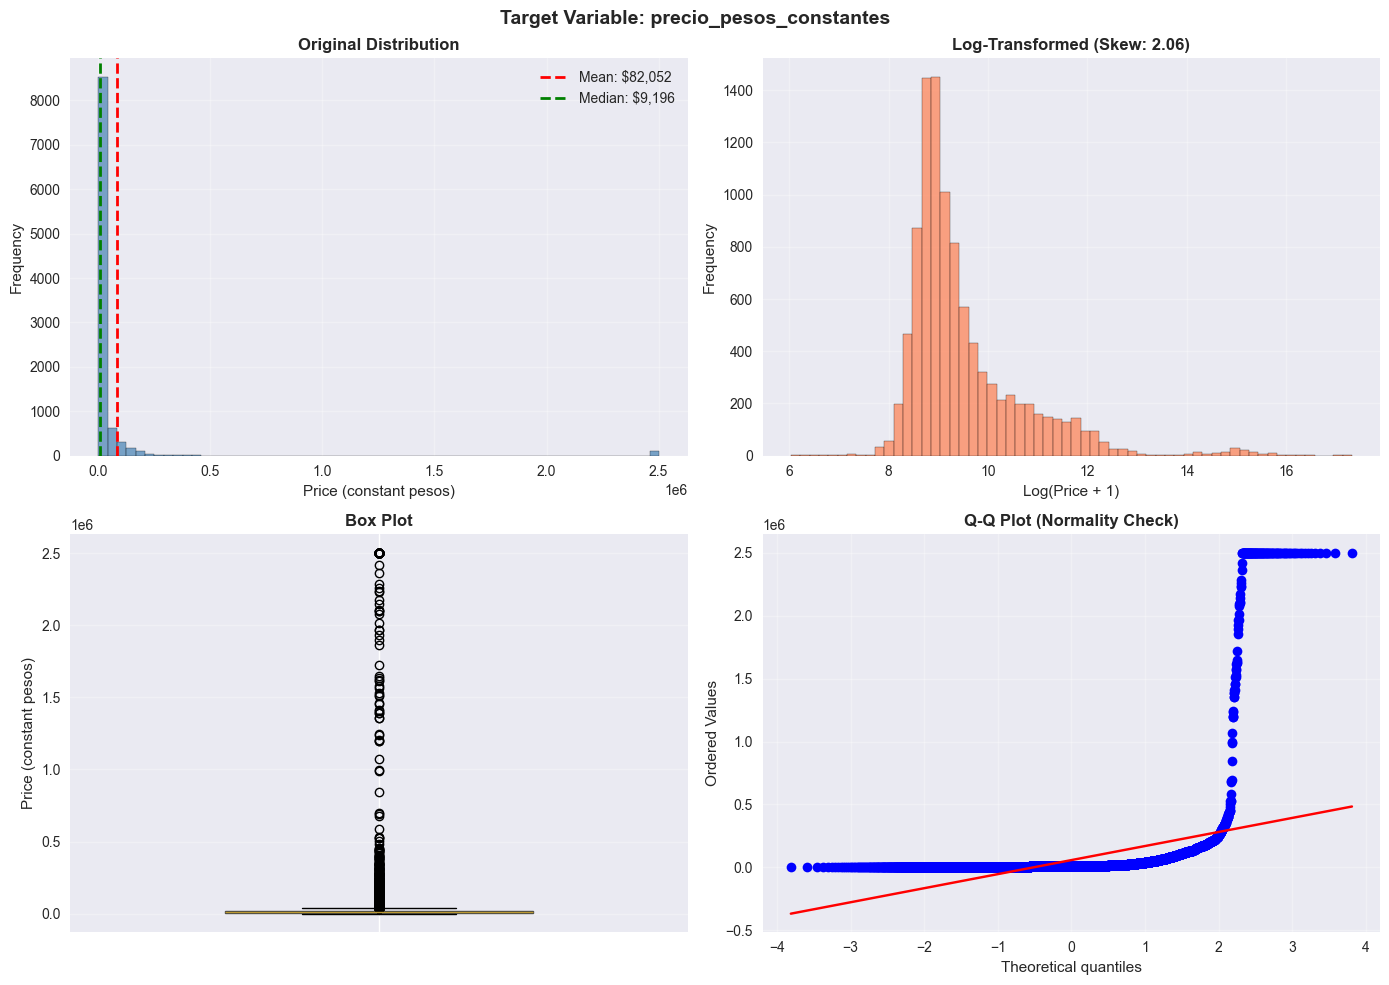


Target Statistics:
  Count: 10,000
  Mean: $82,052
  Median: $9,196
  Std: $653,870
  Min: $416
  Max: $33,244,978
  Skewness: 25.58 (NEEDS LOG TRANSFORM)
  Kurtosis: 1012.58


BIVARIATE RELATIONSHIPS:
----------------------------------------------------------------------------------------------------


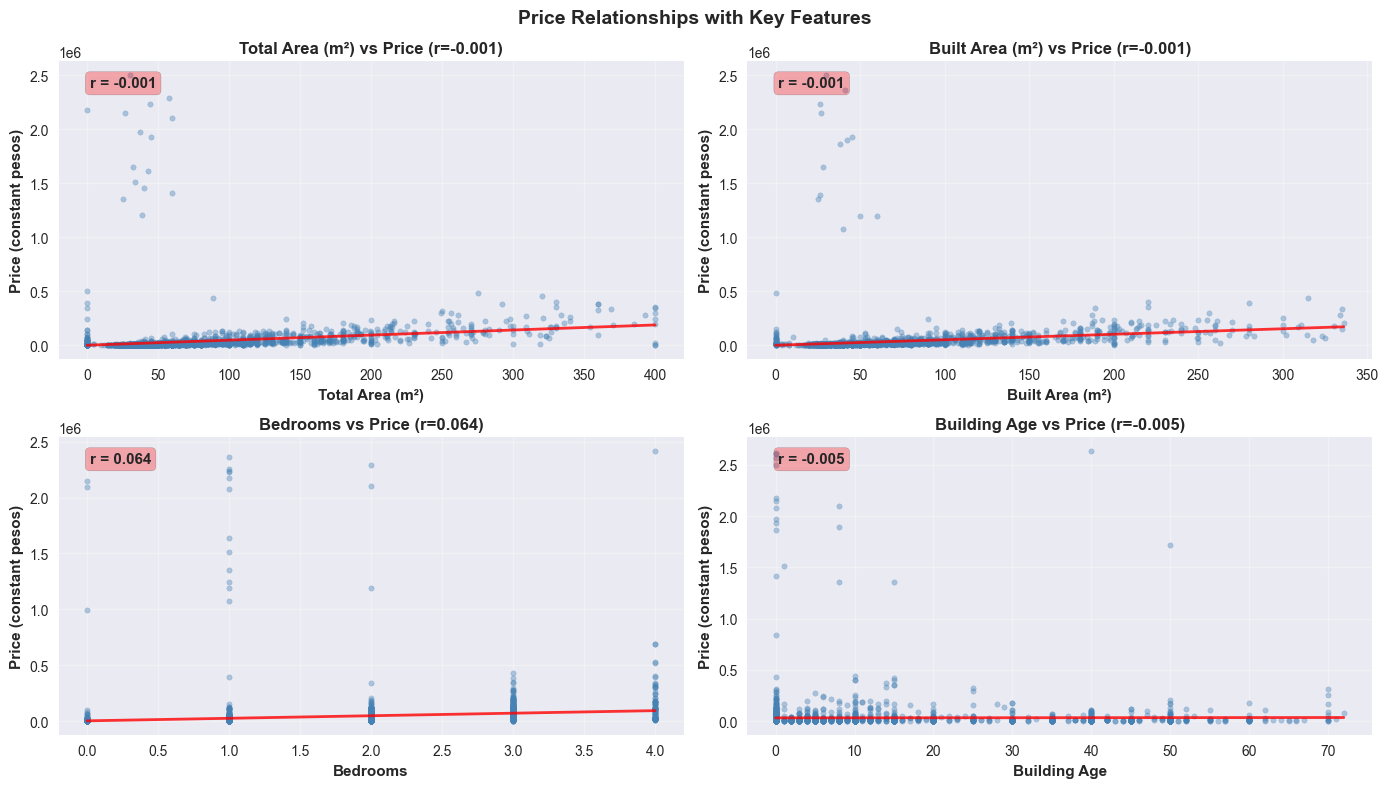


CATEGORICAL ANALYSIS:
----------------------------------------------------------------------------------------------------


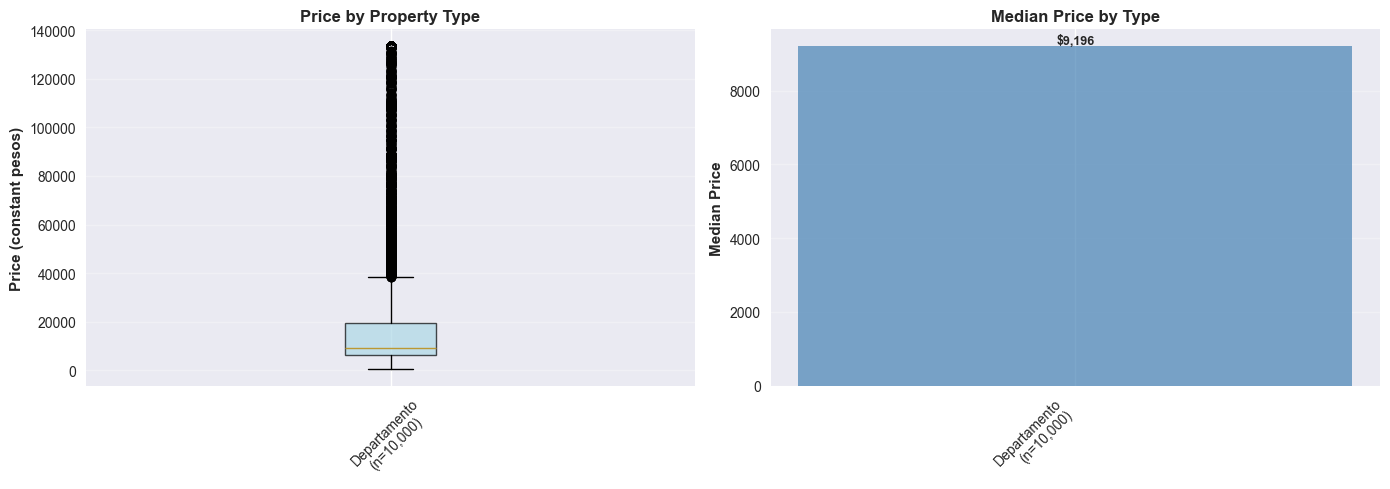


Price by Property Type:
  Departamento: Mean=$23,540, Median=$9,196, n=10,000


TRANSFORMATION & MODELING RECOMMENDATIONS

VARIABLE TRANSFORMATIONS NEEDED:
----------------------------------------------------------------------------------------------------
  precio_pesos_constantes: LOG TRANSFORM (skew=24.51)
  STotalM2: LOG TRANSFORM (skew=320.05)
  SConstrM2: LOG TRANSFORM (skew=263.48)
  Dormitorios: LOG TRANSFORM (skew=22.36)
  Banos: LOG TRANSFORM (skew=74.51)
  Ambientes: LOG TRANSFORM (skew=32.17)
  Antiguedad: LOG TRANSFORM (skew=52.96)
  Cocheras: LOG TRANSFORM (skew=94.99)


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# ============================================================================
# COMPREHENSIVE BUT EFFICIENT DISTRIBUTION ANALYSIS
# ============================================================================

def analyze_distributions(df, target_col='precio_pesos_constantes', sample_size=5000):
    """
    Comprehensive distribution analysis optimized for speed.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataset
    target_col : str
        Target variable name
    sample_size : int
        Sample size for heavy computations (speeds up analysis)
    """
    
    # Define columns
    numeric_cols = ['precio_pesos_constantes', 'STotalM2', 'SConstrM2', 
                   'Dormitorios', 'Banos', 'Ambientes', 'Antiguedad', 'Cocheras']
    numeric_cols = [col for col in numeric_cols if col in df.columns]
    
    print("=" * 100)
    print("COMPREHENSIVE DISTRIBUTION ANALYSIS")
    print("=" * 100)
    print(f"Analyzing {len(numeric_cols)} variables | Dataset size: {len(df):,} rows")
    print()
    
    # Sample data for speed (if needed)
    df_analysis = df.sample(min(sample_size, len(df)), random_state=42) if len(df) > sample_size else df.copy()
    
    # 1. Statistical Summary
    print_statistics(df, numeric_cols)
    
    # 2. Distribution Visualizations (Histograms + Box plots)
    plot_distributions(df_analysis, numeric_cols)
    
    # 3. Correlation Analysis
    analyze_correlations(df_analysis, numeric_cols, target_col)
    
    # 4. Target Variable Deep Dive
    analyze_target(df_analysis, target_col)
    
    # 5. Key Relationships (Scatter plots)
    analyze_relationships(df_analysis, target_col)
    
    # 6. Categorical Analysis (if applicable)
    if 'TIPOPROPIEDAD' in df.columns:
        analyze_by_property_type(df_analysis, target_col)
    
    # 7. Actionable Recommendations
    print_recommendations(df, numeric_cols, target_col)


def print_statistics(df, numeric_cols):
    """Comprehensive statistics table."""
    
    print("STATISTICAL SUMMARY:")
    print("-" * 100)
    
    stats_list = []
    for col in numeric_cols:
        data = pd.to_numeric(df[col], errors='coerce').dropna()
        
        if len(data) == 0:
            continue
        
        stats_list.append({
            'Variable': col,
            'Count': f"{len(data):,}",
            'Mean': f"{data.mean():,.0f}",
            'Median': f"{data.median():,.0f}",
            'Std': f"{data.std():,.0f}",
            'Min': f"{data.min():,.0f}",
            'Max': f"{data.max():,.0f}",
            'Skew': f"{data.skew():.2f}",
            'Missing%': f"{(df[col].isnull().sum() / len(df) * 100):.1f}"
        })
    
    stats_df = pd.DataFrame(stats_list)
    print(stats_df.to_string(index=False))
    
    # Key insights
    print("\nKEY INSIGHTS:")
    print("-" * 100)
    for col in numeric_cols:
        data = pd.to_numeric(df[col], errors='coerce').dropna()
        if len(data) == 0:
            continue
        
        skew = data.skew()
        if abs(skew) > 1:
            print(f"  {col}: {'Right' if skew > 0 else 'Left'}-skewed (skew={skew:.2f}) - Transformation recommended")
    print()


def plot_distributions(df, numeric_cols):
    """Distribution plots: histograms and box plots side by side."""
    
    print("\nDISTRIBUTION VISUALIZATIONS:")
    print("-" * 100)
    
    n_vars = len(numeric_cols)
    n_rows = (n_vars + 1) // 2
    
    # Figure 1: Histograms
    fig, axes = plt.subplots(n_rows, 2, figsize=(14, n_rows * 3.5))
    axes = axes.flatten() if n_vars > 1 else [axes]
    
    for idx, col in enumerate(numeric_cols):
        if idx >= len(axes):
            break
        
        data = pd.to_numeric(df[col], errors='coerce').dropna()
        
        # Clip extreme outliers for visualization
        data_viz = data.clip(upper=data.quantile(0.99))
        
        # Histogram with statistics
        axes[idx].hist(data_viz, bins=50, alpha=0.7, color='steelblue', edgecolor='black')
        axes[idx].axvline(data.mean(), color='red', linestyle='--', linewidth=2, 
                         label=f'Mean: {data.mean():,.0f}')
        axes[idx].axvline(data.median(), color='green', linestyle='--', linewidth=2, 
                         label=f'Median: {data.median():,.0f}')
        
        # Title with skewness
        skew = data.skew()
        skew_color = 'red' if abs(skew) > 1 else 'orange' if abs(skew) > 0.5 else 'green'
        axes[idx].set_title(f'{col} (Skew: {skew:.2f})', 
                           fontweight='bold', fontsize=11,
                           color=skew_color)
        axes[idx].set_xlabel('Value')
        axes[idx].set_ylabel('Frequency')
        axes[idx].legend(fontsize=8)
        axes[idx].grid(alpha=0.3)
    
    # Hide unused
    for idx in range(n_vars, len(axes)):
        axes[idx].axis('off')
    
    plt.suptitle('Distribution Analysis - Histograms', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Figure 2: Box plots
    fig, axes = plt.subplots(n_rows, 2, figsize=(14, n_rows * 3.5))
    axes = axes.flatten() if n_vars > 1 else [axes]
    
    for idx, col in enumerate(numeric_cols):
        if idx >= len(axes):
            break
        
        data = pd.to_numeric(df[col], errors='coerce').dropna()
        data_viz = data.clip(upper=data.quantile(0.95))
        
        # Box plot
        bp = axes[idx].boxplot([data_viz], vert=True, patch_artist=True, widths=0.5)
        bp['boxes'][0].set_facecolor('lightblue')
        bp['boxes'][0].set_alpha(0.7)
        
        axes[idx].set_title(f'{col}', fontweight='bold', fontsize=11)
        axes[idx].set_ylabel('Value')
        axes[idx].set_xticklabels([''])
        axes[idx].grid(alpha=0.3, axis='y')
        
        # Add stats box
        stats_text = f'n={len(data):,}\nμ={data.mean():,.0f}\nσ={data.std():,.0f}'
        axes[idx].text(1.15, 0.5, stats_text, transform=axes[idx].transData,
                      fontsize=9, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    # Hide unused
    for idx in range(n_vars, len(axes)):
        axes[idx].axis('off')
    
    plt.suptitle('Distribution Analysis - Box Plots', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()


def analyze_correlations(df, numeric_cols, target_col):
    """Correlation analysis with heatmap and target focus."""
    
    print("\nCORRELATION ANALYSIS:")
    print("-" * 100)
    
    # Prepare data
    df_corr = df[numeric_cols].apply(pd.to_numeric, errors='coerce').dropna()
    
    if len(df_corr) == 0:
        print("Insufficient data for correlation analysis")
        return
    
    corr_matrix = df_corr.corr()
    
    # Visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Heatmap (lower triangle only)
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
    sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', 
                cmap='coolwarm', center=0, square=True, ax=ax1,
                linewidths=1, cbar_kws={'shrink': 0.8})
    ax1.set_title('Correlation Matrix', fontweight='bold', fontsize=12)
    
    # Target correlation bar plot
    if target_col in corr_matrix.columns:
        target_corr = corr_matrix[target_col].drop(target_col).sort_values()
        
        colors = ['green' if x > 0.3 else 'red' if x < -0.3 else 'gray' for x in target_corr]
        bars = ax2.barh(range(len(target_corr)), target_corr.values, color=colors, alpha=0.7)
        ax2.set_yticks(range(len(target_corr)))
        ax2.set_yticklabels(target_corr.index, fontsize=10)
        ax2.set_xlabel('Correlation Coefficient', fontweight='bold')
        ax2.set_title(f'Correlation with {target_col}', fontweight='bold', fontsize=12)
        ax2.axvline(0, color='black', linewidth=1)
        ax2.axvline(0.3, color='green', linestyle='--', alpha=0.5, linewidth=1)
        ax2.axvline(-0.3, color='red', linestyle='--', alpha=0.5, linewidth=1)
        ax2.grid(alpha=0.3, axis='x')
        
        # Add values on bars
        for i, (bar, val) in enumerate(zip(bars, target_corr.values)):
            ax2.text(val + 0.02 if val > 0 else val - 0.02, i, f'{val:.2f}',
                    va='center', ha='left' if val > 0 else 'right', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # Print insights
    if target_col in corr_matrix.columns:
        target_corr = corr_matrix[target_col].drop(target_col)
        
        strong_pos = target_corr[target_corr > 0.5]
        moderate = target_corr[(target_corr > 0.3) & (target_corr <= 0.5)]
        weak = target_corr[abs(target_corr) < 0.1]
        
        print("\nCORRELATION INSIGHTS:")
        print("-" * 100)
        
        if len(strong_pos) > 0:
            print("Strong Positive Correlations (>0.5):")
            for var, corr in strong_pos.items():
                print(f"  {var}: {corr:.3f}")
        
        if len(moderate) > 0:
            print("\nModerate Correlations (0.3-0.5):")
            for var, corr in moderate.items():
                print(f"  {var}: {corr:.3f}")
        
        if len(weak) > 0:
            print("\nWeak Correlations (<0.1) - Consider removing:")
            for var, corr in weak.items():
                print(f"  {var}: {corr:.3f}")
        
        # Multicollinearity check
        high_corr = []
        for i in range(len(corr_matrix.columns)):
            for j in range(i+1, len(corr_matrix.columns)):
                if abs(corr_matrix.iloc[i, j]) > 0.8:
                    high_corr.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
        
        if high_corr:
            print("\nWARNING - Multicollinearity detected (|r| > 0.8):")
            for var1, var2, corr in high_corr:
                print(f"  {var1} <-> {var2}: {corr:.3f}")
        
        print()


def analyze_target(df, target_col):
    """Deep dive on target variable."""
    
    if target_col not in df.columns:
        return
    
    print("\nTARGET VARIABLE ANALYSIS:")
    print("-" * 100)
    
    target = pd.to_numeric(df[target_col], errors='coerce').dropna()
    
    # Visualization
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # 1. Original distribution
    target_viz = target.clip(upper=target.quantile(0.99))
    axes[0, 0].hist(target_viz, bins=60, alpha=0.7, color='steelblue', edgecolor='black')
    axes[0, 0].axvline(target.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${target.mean():,.0f}')
    axes[0, 0].axvline(target.median(), color='green', linestyle='--', linewidth=2, label=f'Median: ${target.median():,.0f}')
    axes[0, 0].set_xlabel('Price (constant pesos)')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].set_title('Original Distribution', fontweight='bold')
    axes[0, 0].legend()
    axes[0, 0].grid(alpha=0.3)
    
    # 2. Log-transformed
    log_target = np.log1p(target)
    axes[0, 1].hist(log_target, bins=60, alpha=0.7, color='coral', edgecolor='black')
    axes[0, 1].set_xlabel('Log(Price + 1)')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].set_title(f'Log-Transformed (Skew: {log_target.skew():.2f})', fontweight='bold')
    axes[0, 1].grid(alpha=0.3)
    
    # 3. Box plot
    bp = axes[1, 0].boxplot([target_viz], vert=True, patch_artist=True, widths=0.5)
    bp['boxes'][0].set_facecolor('lightblue')
    bp['boxes'][0].set_alpha(0.7)
    axes[1, 0].set_ylabel('Price (constant pesos)')
    axes[1, 0].set_title('Box Plot', fontweight='bold')
    axes[1, 0].set_xticklabels([''])
    axes[1, 0].grid(alpha=0.3, axis='y')
    
    # 4. Q-Q plot
    stats.probplot(target_viz, dist="norm", plot=axes[1, 1])
    axes[1, 1].set_title('Q-Q Plot (Normality Check)', fontweight='bold')
    axes[1, 1].grid(alpha=0.3)
    
    plt.suptitle(f'Target Variable: {target_col}', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    print(f"\nTarget Statistics:")
    print(f"  Count: {len(target):,}")
    print(f"  Mean: ${target.mean():,.0f}")
    print(f"  Median: ${target.median():,.0f}")
    print(f"  Std: ${target.std():,.0f}")
    print(f"  Min: ${target.min():,.0f}")
    print(f"  Max: ${target.max():,.0f}")
    print(f"  Skewness: {target.skew():.2f} {'(NEEDS LOG TRANSFORM)' if target.skew() > 1 else ''}")
    print(f"  Kurtosis: {target.kurtosis():.2f}")
    print()


def analyze_relationships(df, target_col):
    """Key scatter plots with target."""
    
    if target_col not in df.columns:
        return
    
    print("\nBIVARIATE RELATIONSHIPS:")
    print("-" * 100)
    
    # Key variables to plot against target
    key_vars = {
        'STotalM2': 'Total Area (m²)',
        'SConstrM2': 'Built Area (m²)',
        'Dormitorios': 'Bedrooms',
        'Antiguedad': 'Building Age'
    }
    
    available_vars = {k: v for k, v in key_vars.items() if k in df.columns}
    
    if len(available_vars) == 0:
        print("No variables available for bivariate analysis")
        return
    
    # Create scatter plots
    n_plots = len(available_vars)
    n_cols = 2
    n_rows = (n_plots + 1) // 2
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 4))
    axes = axes.flatten() if n_plots > 1 else [axes]
    
    for idx, (var, label) in enumerate(available_vars.items()):
        data = df[[var, target_col]].apply(pd.to_numeric, errors='coerce').dropna()
        
        # Clip outliers
        data_viz = data[
            (data[var] <= data[var].quantile(0.99)) & 
            (data[target_col] <= data[target_col].quantile(0.99))
        ]
        
        # Sample if too large
        if len(data_viz) > 3000:
            data_viz = data_viz.sample(3000, random_state=42)
        
        # Scatter
        axes[idx].scatter(data_viz[var], data_viz[target_col], 
                         alpha=0.4, s=15, color='steelblue')
        
        # Trend line
        try:
            z = np.polyfit(data_viz[var], data_viz[target_col], 1)
            p = np.poly1d(z)
            x_line = np.linspace(data_viz[var].min(), data_viz[var].max(), 100)
            axes[idx].plot(x_line, p(x_line), "r-", linewidth=2, alpha=0.8)
        except:
            pass
        
        # Calculate correlation
        corr = data[var].corr(data[target_col])
        
        # Styling
        axes[idx].set_xlabel(label, fontweight='bold')
        axes[idx].set_ylabel('Price (constant pesos)', fontweight='bold')
        axes[idx].set_title(f'{label} vs Price (r={corr:.3f})', fontweight='bold')
        axes[idx].grid(alpha=0.3)
        
        # Correlation box
        color = 'green' if abs(corr) > 0.5 else 'orange' if abs(corr) > 0.3 else 'red'
        axes[idx].text(0.05, 0.95, f'r = {corr:.3f}', 
                      transform=axes[idx].transAxes, fontsize=11, fontweight='bold',
                      verticalalignment='top',
                      bbox=dict(boxstyle='round', facecolor=color, alpha=0.3))
    
    # Hide unused
    for idx in range(len(available_vars), len(axes)):
        axes[idx].axis('off')
    
    plt.suptitle('Price Relationships with Key Features', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()


def analyze_by_property_type(df, target_col):
    """Analyze price by property type."""
    
    print("\nCATEGORICAL ANALYSIS:")
    print("-" * 100)
    
    # Top 5 property types
    top_types = df['TIPOPROPIEDAD'].value_counts().head(5).index
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    # Box plot
    data_list = []
    labels = []
    
    for prop_type in top_types:
        type_data = pd.to_numeric(df[df['TIPOPROPIEDAD'] == prop_type][target_col], errors='coerce').dropna()
        type_data = type_data.clip(upper=type_data.quantile(0.95))
        
        if len(type_data) > 0:
            data_list.append(type_data)
            labels.append(f'{prop_type}\n(n={len(type_data):,})')
    
    bp = ax1.boxplot(data_list, labels=labels, patch_artist=True)
    for patch in bp['boxes']:
        patch.set_facecolor('lightblue')
        patch.set_alpha(0.7)
    
    ax1.set_ylabel('Price (constant pesos)', fontweight='bold')
    ax1.set_title('Price by Property Type', fontweight='bold')
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(alpha=0.3, axis='y')
    
    # Median comparison
    medians = [d.median() for d in data_list]
    bars = ax2.bar(range(len(labels)), medians, color='steelblue', alpha=0.7)
    ax2.set_xticks(range(len(labels)))
    ax2.set_xticklabels(labels, rotation=45, ha='right')
    ax2.set_ylabel('Median Price', fontweight='bold')
    ax2.set_title('Median Price by Type', fontweight='bold')
    ax2.grid(alpha=0.3, axis='y')
    
    # Add values
    for bar, price in zip(bars, medians):
        ax2.text(bar.get_x() + bar.get_width()/2, price, f'${price:,.0f}',
                ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Print stats
    print("\nPrice by Property Type:")
    for prop_type, data in zip(top_types, data_list):
        print(f"  {prop_type}: Mean=${data.mean():,.0f}, Median=${data.median():,.0f}, n={len(data):,}")
    print()


def print_recommendations(df, numeric_cols, target_col):
    """Final recommendations."""
    
    print("\n" + "=" * 100)
    print("TRANSFORMATION & MODELING RECOMMENDATIONS")
    print("=" * 100)
    
    # Transformations
    print("\nVARIABLE TRANSFORMATIONS NEEDED:")
    print("-" * 100)
    
    for col in numeric_cols:
        data = pd.to_numeric(df[col], errors='coerce').dropna()
        
        if len(data) == 0:
            continue
        
        skew = data.skew()
        
        if abs(skew) > 1.5:
            print(f"  {col}: LOG TRANSFORM (skew={skew:.2f})")
        elif abs(skew) > 0.75:
            print(f"  {col}: Consider transformation (skew={skew:.2f})")
        else:
            print(f"  {col}: No transformation needed (skew={skew:.2f})")
    
# Usage
analyze_distributions(df, sample_size=10000) 

GEOGRAPHIC & TEMPORAL ANALYSIS

GEOGRAPHIC ANALYSIS:
----------------------------------------------------------------------------------------------------


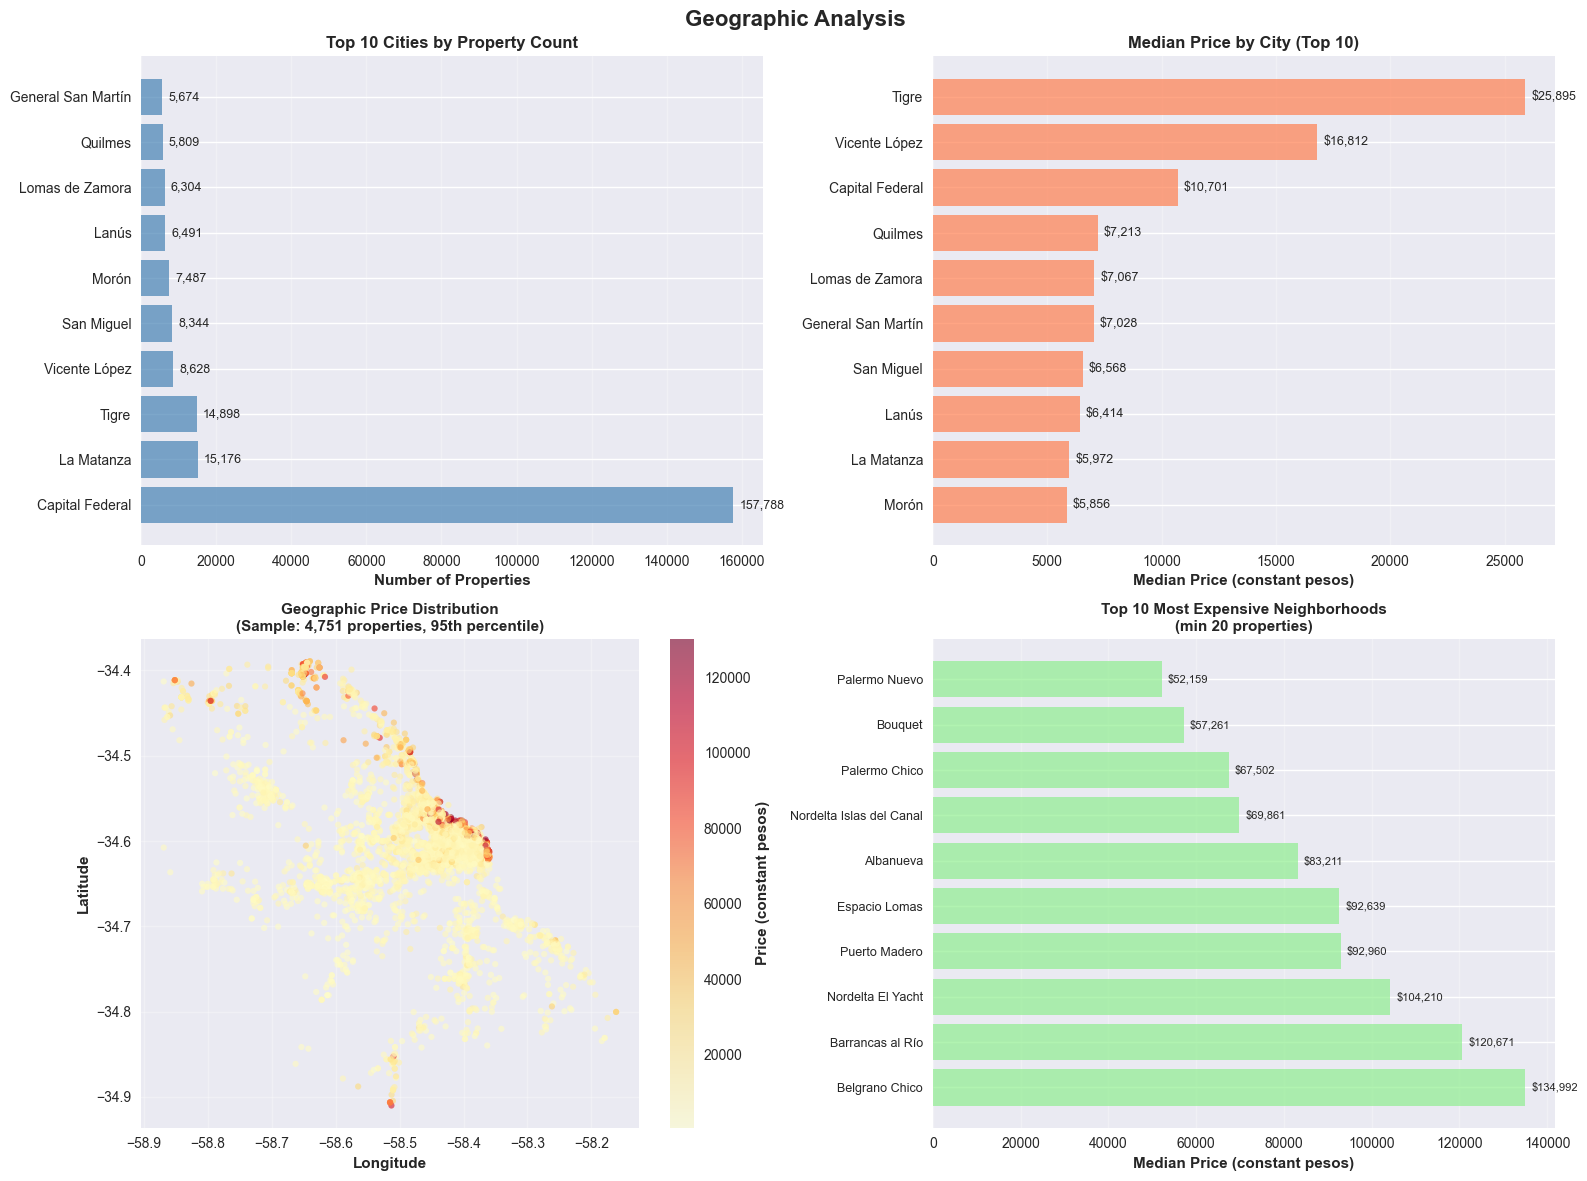


TEMPORAL ANALYSIS:
----------------------------------------------------------------------------------------------------


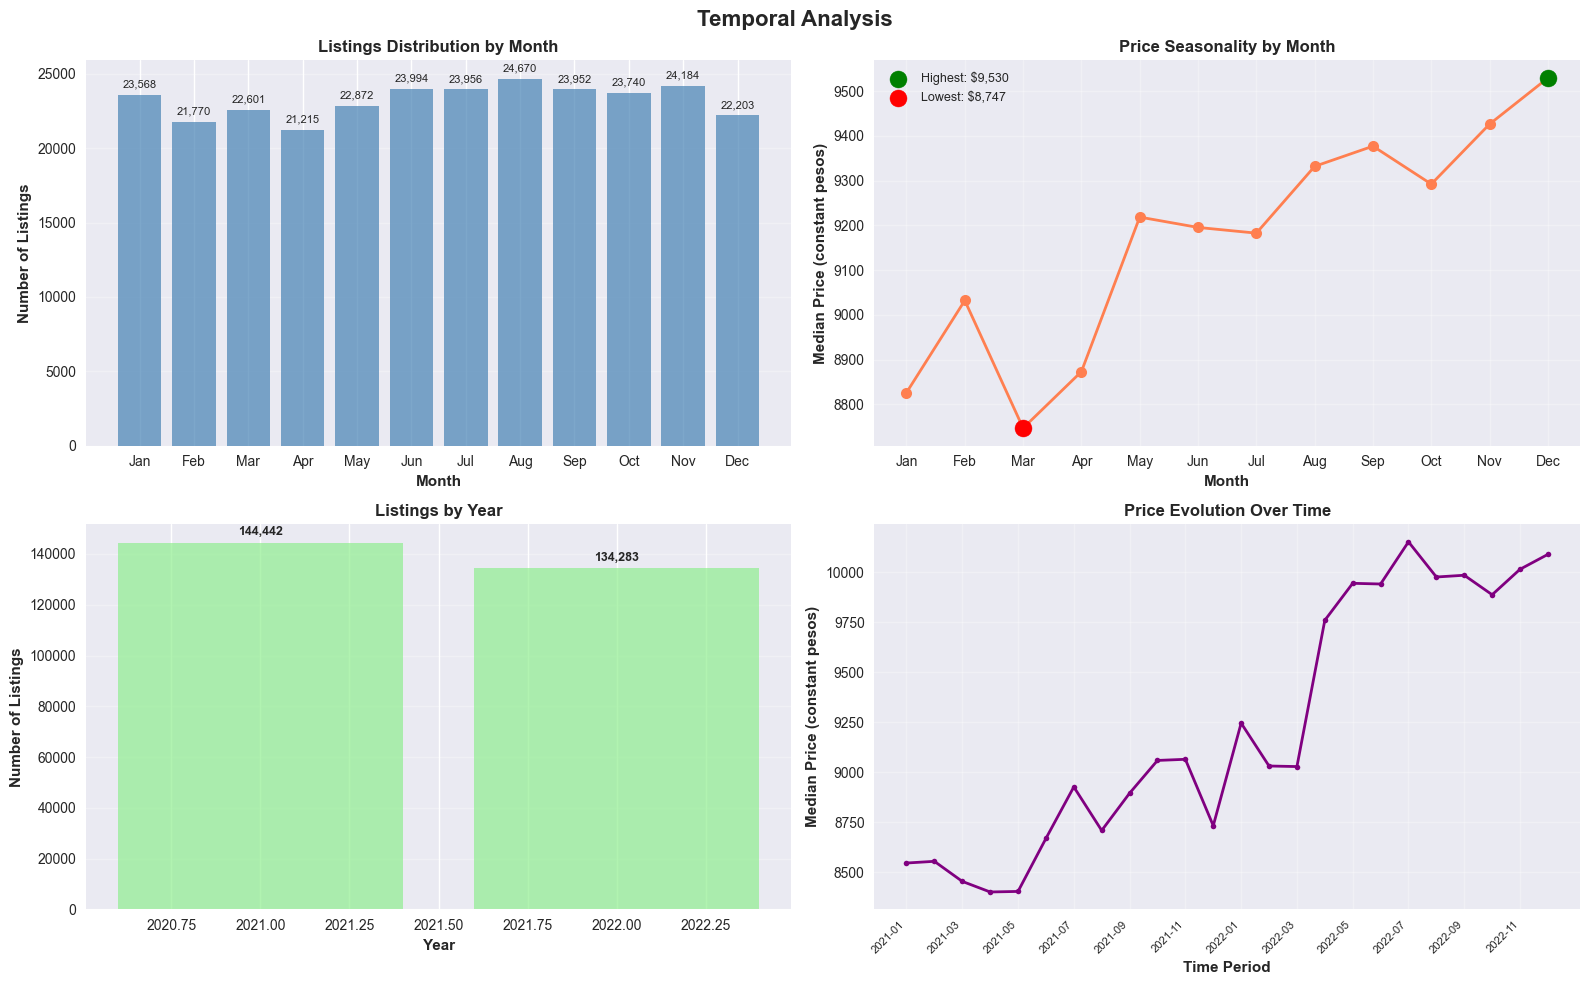


AMENITIES ANALYSIS:
----------------------------------------------------------------------------------------------------


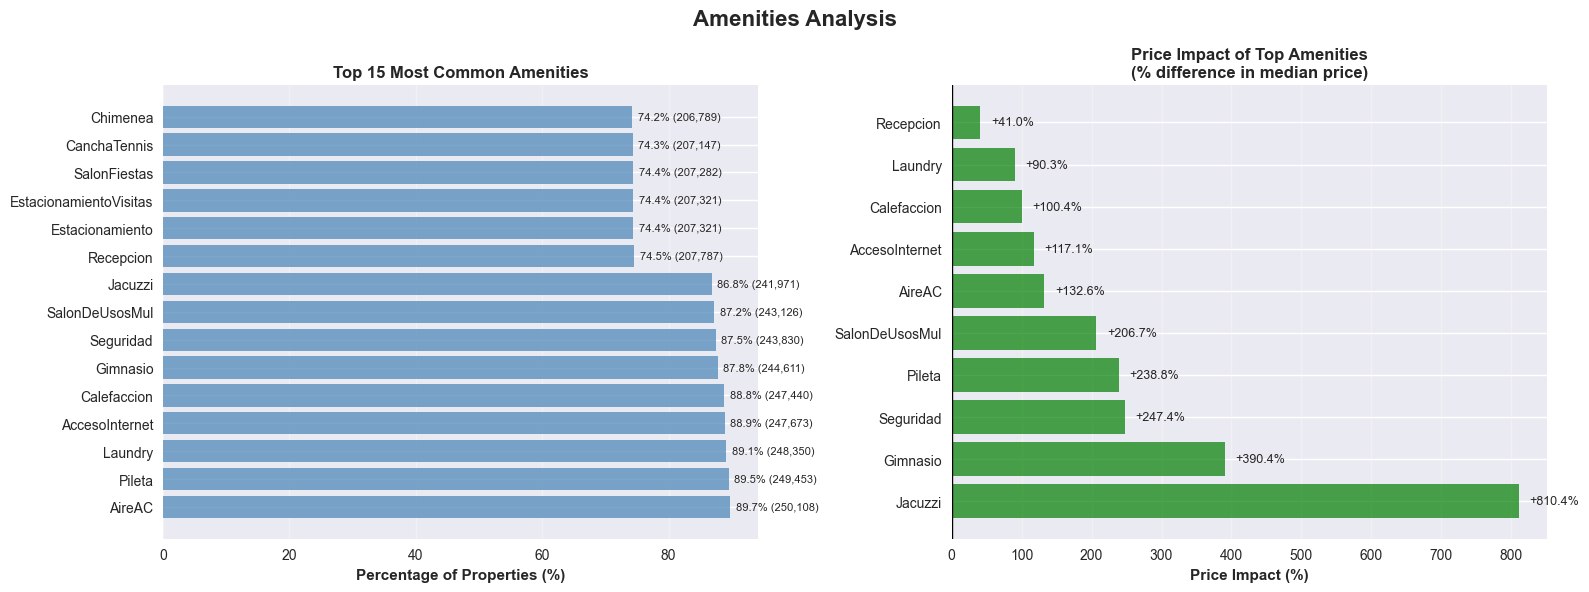



KEY INSIGHTS

GEOGRAPHIC INSIGHTS:
----------------------------------------------------------------------------------------------------
  - Most listings in: Capital Federal (157,788 properties, 56.6%)
  - Most expensive city: Tigre ($25,895 median)
  - Most affordable city: Hurlingham ($5,102 median)

TEMPORAL INSIGHTS:
----------------------------------------------------------------------------------------------------
  - Peak listing month: Aug (24,670 listings)
  - Slowest month: Apr (21,215 listings)
  - Highest prices in: Dec ($9,530)
  - Lowest prices in: Mar ($8,747)



In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# ============================================================================
# GEOGRAPHIC & TEMPORAL ANALYSIS
# ============================================================================

def analyze_geographic_temporal(df, target_col='precio_pesos_constantes'):
    """
    Comprehensive geographic and temporal analysis for rental data.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataset
    target_col : str
        Target variable (price)
    """
    
    print("=" * 100)
    print("GEOGRAPHIC & TEMPORAL ANALYSIS")
    print("=" * 100)
    print()
    
    # 1. Geographic Analysis
    plot_geographic_analysis(df, target_col)
    
    # 2. Temporal Analysis
    plot_temporal_analysis(df, target_col)
    
    # 3. Amenities Analysis
    plot_amenities_analysis(df, target_col)
    
    # 4. Combined Insights
    print_geographic_insights(df, target_col)


def plot_geographic_analysis(df, target_col):
    """Geographic distribution and price patterns."""
    
    print("GEOGRAPHIC ANALYSIS:")
    print("-" * 100)
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Top cities by property count
    if 'ITE_ADD_CITY_NAME' in df.columns:
        city_counts = df['ITE_ADD_CITY_NAME'].value_counts().head(10)
        
        bars = axes[0, 0].barh(range(len(city_counts)), city_counts.values, color='steelblue', alpha=0.7)
        axes[0, 0].set_yticks(range(len(city_counts)))
        axes[0, 0].set_yticklabels(city_counts.index, fontsize=10)
        axes[0, 0].set_xlabel('Number of Properties', fontweight='bold')
        axes[0, 0].set_title('Top 10 Cities by Property Count', fontweight='bold', fontsize=12)
        axes[0, 0].grid(alpha=0.3, axis='x')
        
        # Add value labels
        for i, (bar, val) in enumerate(zip(bars, city_counts.values)):
            axes[0, 0].text(val + max(city_counts.values) * 0.01, i, f'{val:,}', 
                           va='center', fontsize=9)
    else:
        axes[0, 0].text(0.5, 0.5, 'City data not available', 
                       ha='center', va='center', transform=axes[0, 0].transAxes)
    
    # 2. Average price by city
    if 'ITE_ADD_CITY_NAME' in df.columns and target_col in df.columns:
        top_cities = df['ITE_ADD_CITY_NAME'].value_counts().head(10).index
        city_prices = df[df['ITE_ADD_CITY_NAME'].isin(top_cities)].groupby('ITE_ADD_CITY_NAME')[target_col].median().sort_values(ascending=True)
        
        bars = axes[0, 1].barh(range(len(city_prices)), city_prices.values, color='coral', alpha=0.7)
        axes[0, 1].set_yticks(range(len(city_prices)))
        axes[0, 1].set_yticklabels(city_prices.index, fontsize=10)
        axes[0, 1].set_xlabel('Median Price (constant pesos)', fontweight='bold')
        axes[0, 1].set_title('Median Price by City (Top 10)', fontweight='bold', fontsize=12)
        axes[0, 1].grid(alpha=0.3, axis='x')
        
        # Add value labels
        for i, (bar, val) in enumerate(zip(bars, city_prices.values)):
            axes[0, 1].text(val + max(city_prices.values) * 0.01, i, f'${val:,.0f}', 
                           va='center', fontsize=9)
    else:
        axes[0, 1].text(0.5, 0.5, 'Price by city data not available', 
                       ha='center', va='center', transform=axes[0, 1].transAxes)
    
    # 3. Geographic price distribution (scatter map)
    if 'LONGITUDE' in df.columns and 'LATITUDE' in df.columns and target_col in df.columns:
        # Sample for visualization
        sample_size = min(5000, len(df))
        sample_df = df.sample(n=sample_size, random_state=42)
        
        # Remove nulls and clip prices for better color scale
        sample_clean = sample_df[['LONGITUDE', 'LATITUDE', target_col]].dropna()
        price_upper = sample_clean[target_col].quantile(0.95)
        sample_clean = sample_clean[sample_clean[target_col] <= price_upper]
        
        scatter = axes[1, 0].scatter(sample_clean['LONGITUDE'], 
                                     sample_clean['LATITUDE'], 
                                     c=sample_clean[target_col],
                                     cmap='YlOrRd', 
                                     alpha=0.6, 
                                     s=20,
                                     edgecolors='none')
        
        axes[1, 0].set_xlabel('Longitude', fontweight='bold')
        axes[1, 0].set_ylabel('Latitude', fontweight='bold')
        axes[1, 0].set_title(f'Geographic Price Distribution\n(Sample: {len(sample_clean):,} properties, 95th percentile)', 
                            fontweight='bold', fontsize=11)
        axes[1, 0].grid(alpha=0.3)
        
        # Add colorbar
        cbar = plt.colorbar(scatter, ax=axes[1, 0])
        cbar.set_label('Price (constant pesos)', fontweight='bold')
    else:
        axes[1, 0].text(0.5, 0.5, 'Geographic coordinates not available', 
                       ha='center', va='center', transform=axes[1, 0].transAxes)
    
    # 4. Top neighborhoods by median price
    if 'ITE_ADD_NEIGHBORHOOD_NAME' in df.columns and target_col in df.columns:
        # Filter neighborhoods with at least 20 properties
        neighborhood_counts = df['ITE_ADD_NEIGHBORHOOD_NAME'].value_counts()
        valid_neighborhoods = neighborhood_counts[neighborhood_counts >= 20].index
        
        neighborhood_prices = df[df['ITE_ADD_NEIGHBORHOOD_NAME'].isin(valid_neighborhoods)].groupby('ITE_ADD_NEIGHBORHOOD_NAME')[target_col].median().sort_values(ascending=False).head(10)
        
        bars = axes[1, 1].barh(range(len(neighborhood_prices)), neighborhood_prices.values, color='lightgreen', alpha=0.7)
        axes[1, 1].set_yticks(range(len(neighborhood_prices)))
        axes[1, 1].set_yticklabels(neighborhood_prices.index, fontsize=9)
        axes[1, 1].set_xlabel('Median Price (constant pesos)', fontweight='bold')
        axes[1, 1].set_title('Top 10 Most Expensive Neighborhoods\n(min 20 properties)', 
                            fontweight='bold', fontsize=11)
        axes[1, 1].grid(alpha=0.3, axis='x')
        
        # Add value labels
        for i, (bar, val) in enumerate(zip(bars, neighborhood_prices.values)):
            axes[1, 1].text(val + max(neighborhood_prices.values) * 0.01, i, f'${val:,.0f}', 
                           va='center', fontsize=8)
    else:
        axes[1, 1].text(0.5, 0.5, 'Neighborhood data not available', 
                       ha='center', va='center', transform=axes[1, 1].transAxes)
    
    plt.suptitle('Geographic Analysis', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    print()


def plot_temporal_analysis(df, target_col):
    """Temporal patterns in listings and prices."""
    
    print("TEMPORAL ANALYSIS:")
    print("-" * 100)
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    
    # Prepare temporal data
    df_temp = df.copy()
    
    # 1. Listings by month
    if 'MesListing' in df.columns:
        try:
            df_temp['MesListing'] = pd.to_datetime(df_temp['MesListing'], errors='coerce')
            df_temp['Month'] = df_temp['MesListing'].dt.month
            df_temp['Year'] = df_temp['MesListing'].dt.year
            
            monthly_counts = df_temp['Month'].value_counts().sort_index()
            
            axes[0, 0].bar(monthly_counts.index, monthly_counts.values, color='steelblue', alpha=0.7)
            axes[0, 0].set_xlabel('Month', fontweight='bold')
            axes[0, 0].set_ylabel('Number of Listings', fontweight='bold')
            axes[0, 0].set_title('Listings Distribution by Month', fontweight='bold', fontsize=12)
            axes[0, 0].set_xticks(range(1, 13))
            axes[0, 0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
            axes[0, 0].grid(alpha=0.3, axis='y')
            
            # Add value labels
            for month, count in monthly_counts.items():
                axes[0, 0].text(month, count + max(monthly_counts.values) * 0.02, 
                               f'{count:,}', ha='center', fontsize=8)
        except:
            axes[0, 0].text(0.5, 0.5, 'Unable to parse date data', 
                           ha='center', va='center', transform=axes[0, 0].transAxes)
    else:
        axes[0, 0].text(0.5, 0.5, 'Month listing data not available', 
                       ha='center', va='center', transform=axes[0, 0].transAxes)
    
    # 2. Average price by month
    if 'MesListing' in df.columns and 'Month' in df_temp.columns and target_col in df.columns:
        monthly_prices = df_temp.groupby('Month')[target_col].median().sort_index()
        
        axes[0, 1].plot(monthly_prices.index, monthly_prices.values, 
                       marker='o', linewidth=2, markersize=8, color='coral')
        axes[0, 1].set_xlabel('Month', fontweight='bold')
        axes[0, 1].set_ylabel('Median Price (constant pesos)', fontweight='bold')
        axes[0, 1].set_title('Price Seasonality by Month', fontweight='bold', fontsize=12)
        axes[0, 1].set_xticks(range(1, 13))
        axes[0, 1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
        axes[0, 1].grid(alpha=0.3)
        
        # Highlight max and min
        max_month = monthly_prices.idxmax()
        min_month = monthly_prices.idxmin()
        axes[0, 1].scatter([max_month], [monthly_prices[max_month]], 
                          color='green', s=150, zorder=5, label=f'Highest: ${monthly_prices[max_month]:,.0f}')
        axes[0, 1].scatter([min_month], [monthly_prices[min_month]], 
                          color='red', s=150, zorder=5, label=f'Lowest: ${monthly_prices[min_month]:,.0f}')
        axes[0, 1].legend(fontsize=9)
    else:
        axes[0, 1].text(0.5, 0.5, 'Temporal price data not available', 
                       ha='center', va='center', transform=axes[0, 1].transAxes)
    
    # 3. Listings by year
    if 'year' in df.columns or ('Year' in df_temp.columns):
        year_col = 'Year' if 'Year' in df_temp.columns else 'year'
        yearly_counts = df_temp[year_col].value_counts().sort_index()
        
        bars = axes[1, 0].bar(yearly_counts.index, yearly_counts.values, color='lightgreen', alpha=0.7)
        axes[1, 0].set_xlabel('Year', fontweight='bold')
        axes[1, 0].set_ylabel('Number of Listings', fontweight='bold')
        axes[1, 0].set_title('Listings by Year', fontweight='bold', fontsize=12)
        axes[1, 0].grid(alpha=0.3, axis='y')
        
        # Add value labels
        for bar, (year, count) in zip(bars, yearly_counts.items()):
            axes[1, 0].text(bar.get_x() + bar.get_width()/2, count + max(yearly_counts.values) * 0.02, 
                           f'{count:,}', ha='center', fontsize=9, fontweight='bold')
    else:
        axes[1, 0].text(0.5, 0.5, 'Year data not available', 
                       ha='center', va='center', transform=axes[1, 0].transAxes)
    
    # 4. Price evolution over time
    if 'MesListing' in df.columns and 'MesListing' in df_temp.columns and target_col in df.columns:
        # Group by year-month
        df_temp['YearMonth'] = df_temp['MesListing'].dt.to_period('M')
        time_prices = df_temp.groupby('YearMonth')[target_col].median().sort_index()
        
        axes[1, 1].plot(range(len(time_prices)), time_prices.values, 
                       linewidth=2, color='purple', marker='o', markersize=4)
        axes[1, 1].set_xlabel('Time Period', fontweight='bold')
        axes[1, 1].set_ylabel('Median Price (constant pesos)', fontweight='bold')
        axes[1, 1].set_title('Price Evolution Over Time', fontweight='bold', fontsize=12)
        axes[1, 1].grid(alpha=0.3)
        
        # Set x-axis labels (show every 3rd month)
        n_periods = len(time_prices)
        step = max(1, n_periods // 10)
        xtick_positions = range(0, n_periods, step)
        xtick_labels = [str(time_prices.index[i]) for i in xtick_positions]
        axes[1, 1].set_xticks(xtick_positions)
        axes[1, 1].set_xticklabels(xtick_labels, rotation=45, ha='right', fontsize=8)
    else:
        axes[1, 1].text(0.5, 0.5, 'Time series data not available', 
                       ha='center', va='center', transform=axes[1, 1].transAxes)
    
    plt.suptitle('Temporal Analysis', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    print()


def plot_amenities_analysis(df, target_col):
    """Amenities frequency and impact on price."""
    
    print("AMENITIES ANALYSIS:")
    print("-" * 100)
    
    # Define amenity columns
    excluded_cols = ['id_grid', 'MesListing', 'TIPOPROPIEDAD', 'STotalM2', 'SConstrM2', 
                    'Dormitorios', 'Banos', 'Ambientes', 'SitioOrigen', 'Amoblado', 
                    'Antiguedad', 'ITE_ADD_CITY_NAME', 'ITE_ADD_STATE_NAME', 
                    'ITE_ADD_NEIGHBORHOOD_NAME', 'ITE_TIPO_PROD', 'LONGITUDE', 
                    'LATITUDE', 'precio_pesos_constantes', 'year', 'Cocheras']
    
    amenity_cols = [col for col in df.columns if col not in excluded_cols]
    
    if len(amenity_cols) == 0:
        print("No amenity columns found")
        return
    
    # Calculate amenity frequency
    amenity_freq = {}
    for col in amenity_cols:
        # Count non-null, non-zero values
        if df[col].dtype in ['object', 'string']:
            count = df[col].notna().sum()
        else:
            count = (pd.to_numeric(df[col], errors='coerce').fillna(0) > 0).sum()
        
        amenity_freq[col] = count
    
    # Get top amenities
    top_amenities = sorted(amenity_freq.items(), key=lambda x: x[1], reverse=True)[:15]
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # 1. Top amenities by frequency
    amenity_names = [item[0] for item in top_amenities]
    amenity_counts = [item[1] for item in top_amenities]
    amenity_pcts = [(count / len(df)) * 100 for count in amenity_counts]
    
    bars = axes[0].barh(range(len(amenity_names)), amenity_pcts, color='steelblue', alpha=0.7)
    axes[0].set_yticks(range(len(amenity_names)))
    axes[0].set_yticklabels(amenity_names, fontsize=10)
    axes[0].set_xlabel('Percentage of Properties (%)', fontweight='bold')
    axes[0].set_title('Top 15 Most Common Amenities', fontweight='bold', fontsize=12)
    axes[0].grid(alpha=0.3, axis='x')
    
    # Add value labels
    for i, (bar, pct, count) in enumerate(zip(bars, amenity_pcts, amenity_counts)):
        axes[0].text(pct + max(amenity_pcts) * 0.01, i, f'{pct:.1f}% ({count:,})', 
                    va='center', fontsize=8)
    
    # 2. Price impact of top amenities
    if target_col in df.columns:
        amenity_impact = {}
        
        for amenity in amenity_names[:10]:  # Top 10 only for clarity
            # Compare median price with vs without amenity
            has_amenity = pd.to_numeric(df[amenity], errors='coerce').fillna(0) > 0
            
            price_with = df[has_amenity][target_col].median()
            price_without = df[~has_amenity][target_col].median()
            
            if pd.notna(price_with) and pd.notna(price_without):
                impact = ((price_with - price_without) / price_without) * 100
                amenity_impact[amenity] = impact
        
        if amenity_impact:
            # Sort by impact
            sorted_impact = sorted(amenity_impact.items(), key=lambda x: x[1], reverse=True)
            impact_names = [item[0] for item in sorted_impact]
            impact_values = [item[1] for item in sorted_impact]
            
            colors = ['green' if x > 0 else 'red' for x in impact_values]
            bars = axes[1].barh(range(len(impact_names)), impact_values, color=colors, alpha=0.7)
            axes[1].set_yticks(range(len(impact_names)))
            axes[1].set_yticklabels(impact_names, fontsize=10)
            axes[1].set_xlabel('Price Impact (%)', fontweight='bold')
            axes[1].set_title('Price Impact of Top Amenities\n(% difference in median price)', 
                             fontweight='bold', fontsize=12)
            axes[1].axvline(0, color='black', linewidth=1)
            axes[1].grid(alpha=0.3, axis='x')
            
            # Add value labels
            for i, (bar, val) in enumerate(zip(bars, impact_values)):
                axes[1].text(val + (max(impact_values) - min(impact_values)) * 0.02 if val > 0 else val - (max(impact_values) - min(impact_values)) * 0.02, 
                            i, f'{val:+.1f}%', va='center', ha='left' if val > 0 else 'right', fontsize=9)
    
    plt.suptitle('Amenities Analysis', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    print()


def print_geographic_insights(df, target_col):
    """Print key geographic and temporal insights."""
    
    print("\n" + "=" * 100)
    print("KEY INSIGHTS")
    print("=" * 100)
    
    # Geographic insights
    if 'ITE_ADD_CITY_NAME' in df.columns:
        print("\nGEOGRAPHIC INSIGHTS:")
        print("-" * 100)
        
        top_city = df['ITE_ADD_CITY_NAME'].value_counts().index[0]
        top_city_count = df['ITE_ADD_CITY_NAME'].value_counts().iloc[0]
        total = len(df)
        
        print(f"  - Most listings in: {top_city} ({top_city_count:,} properties, {top_city_count/total*100:.1f}%)")
        
        if target_col in df.columns:
            city_prices = df.groupby('ITE_ADD_CITY_NAME')[target_col].median().sort_values(ascending=False)
            print(f"  - Most expensive city: {city_prices.index[0]} (${city_prices.iloc[0]:,.0f} median)")
            print(f"  - Most affordable city: {city_prices.index[-1]} (${city_prices.iloc[-1]:,.0f} median)")
    
    # Temporal insights
    if 'MesListing' in df.columns:
        print("\nTEMPORAL INSIGHTS:")
        print("-" * 100)
        
        df_temp = df.copy()
        df_temp['MesListing'] = pd.to_datetime(df_temp['MesListing'], errors='coerce')
        df_temp['Month'] = df_temp['MesListing'].dt.month
        
        monthly_counts = df_temp['Month'].value_counts()
        peak_month = monthly_counts.idxmax()
        low_month = monthly_counts.idxmin()
        
        month_names = ['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        
        print(f"  - Peak listing month: {month_names[peak_month]} ({monthly_counts[peak_month]:,} listings)")
        print(f"  - Slowest month: {month_names[low_month]} ({monthly_counts[low_month]:,} listings)")
        
        if target_col in df.columns:
            monthly_prices = df_temp.groupby('Month')[target_col].median()
            expensive_month = monthly_prices.idxmax()
            cheap_month = monthly_prices.idxmin()
            
            print(f"  - Highest prices in: {month_names[expensive_month]} (${monthly_prices[expensive_month]:,.0f})")
            print(f"  - Lowest prices in: {month_names[cheap_month]} (${monthly_prices[cheap_month]:,.0f})")
    
    print("\n" + "=" * 100)


# Usage
analyze_geographic_temporal(df)

# Clusters

PRICE CLUSTERING ANALYSIS - RENT VS SALE DETECTION

Price Statistics:
  Count: 278,725
  Mean: $80,886
  Median: $9,169
  Min: $43
  Max: $35,187,595
  Max/Median ratio: 3837.5x

----------------------------------------------------------------------------------------------------
K-MEANS CLUSTERING (k=2):
----------------------------------------------------------------------------------------------------

Cluster Results:
          count           mean        median           min           max
cluster                                                                 
0         52420  388771.177949  72716.269320  28697.309396  3.518759e+07
1        226305    9568.699327   7963.461078     42.640377  2.868382e+04

INTERPRETATION:
  Cluster 1 → Likely RENT (lower prices)
    - Median: $7,963
    - Count: 226,305 (81.2%)
  Cluster 0 → Likely SALE (higher prices)
    - Median: $72,716
    - Count: 52,420 (18.8%)

Suggested threshold: $15,927


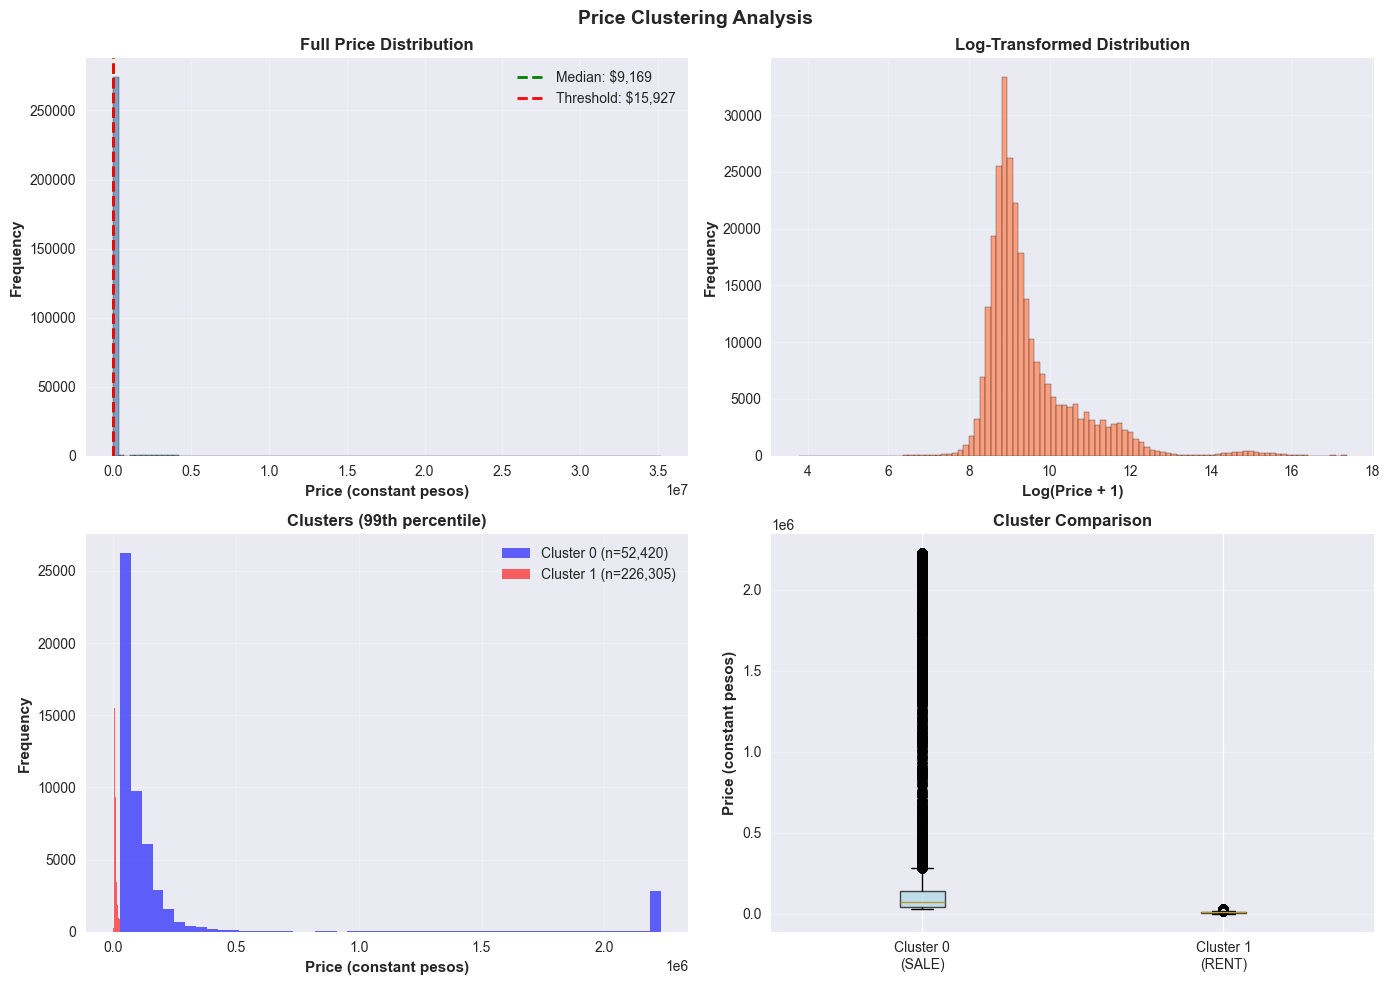


FINDINGS:

MODERATE EVIDENCE of different price segments:
  - Price ratio between clusters: 9.1x


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy import stats

# ============================================================================
# FAST PRICE CLUSTERING - RENT VS SALE DETECTION
# ============================================================================

def analyze_price_clusters(df, target_col='precio_pesos_constantes'):
    """Fast clustering analysis to detect rent vs sale listings."""
    
    print("=" * 100)
    print("PRICE CLUSTERING ANALYSIS - RENT VS SALE DETECTION")
    print("=" * 100)
    
    if target_col not in df.columns:
        print("Target column not found!")
        return
    
    prices = pd.to_numeric(df[target_col], errors='coerce').dropna()
    
    # Quick statistics
    print(f"\nPrice Statistics:")
    print(f"  Count: {len(prices):,}")
    print(f"  Mean: ${prices.mean():,.0f}")
    print(f"  Median: ${prices.median():,.0f}")
    print(f"  Min: ${prices.min():,.0f}")
    print(f"  Max: ${prices.max():,.0f}")
    print(f"  Max/Median ratio: {prices.max() / prices.median():.1f}x")
    
    # Perform simple K-means clustering (k=2)
    print("\n" + "-" * 100)
    print("K-MEANS CLUSTERING (k=2):")
    print("-" * 100)
    
    # Use log prices for better clustering
    log_prices = np.log1p(prices).values.reshape(-1, 1)
    
    scaler = StandardScaler()
    log_prices_scaled = scaler.fit_transform(log_prices)
    
    kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(log_prices_scaled)
    
    # Get cluster statistics
    df_temp = pd.DataFrame({'price': prices, 'cluster': clusters})
    cluster_stats = df_temp.groupby('cluster')['price'].agg(['count', 'mean', 'median', 'min', 'max'])
    
    # Identify which is rent vs sale (lower median = rent)
    cluster_medians = df_temp.groupby('cluster')['price'].median().sort_values()
    likely_rent = cluster_medians.index[0]
    likely_sale = cluster_medians.index[1]
    
    print("\nCluster Results:")
    print(cluster_stats.to_string())
    
    print(f"\nINTERPRETATION:")
    print(f"  Cluster {likely_rent} → Likely RENT (lower prices)")
    print(f"    - Median: ${cluster_medians.iloc[0]:,.0f}")
    print(f"    - Count: {(clusters == likely_rent).sum():,} ({(clusters == likely_rent).sum()/len(clusters)*100:.1f}%)")
    
    print(f"  Cluster {likely_sale} → Likely SALE (higher prices)")
    print(f"    - Median: ${cluster_medians.iloc[1]:,.0f}")
    print(f"    - Count: {(clusters == likely_sale).sum():,} ({(clusters == likely_sale).sum()/len(clusters)*100:.1f}%)")
    
    # Calculate suggested threshold
    threshold = cluster_medians.iloc[0] * 2  # Simple heuristic
    print(f"\nSuggested threshold: ${threshold:,.0f}")
    
    # Visualizations (simple and fast)
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # 1. Full distribution
    axes[0, 0].hist(prices, bins=100, alpha=0.7, color='steelblue', edgecolor='black')
    axes[0, 0].axvline(prices.median(), color='green', linestyle='--', linewidth=2, 
                      label=f'Median: ${prices.median():,.0f}')
    axes[0, 0].axvline(threshold, color='red', linestyle='--', linewidth=2, 
                      label=f'Threshold: ${threshold:,.0f}')
    axes[0, 0].set_xlabel('Price (constant pesos)', fontweight='bold')
    axes[0, 0].set_ylabel('Frequency', fontweight='bold')
    axes[0, 0].set_title('Full Price Distribution', fontweight='bold')
    axes[0, 0].legend()
    axes[0, 0].grid(alpha=0.3)
    
    # 2. Log distribution
    axes[0, 1].hist(np.log1p(prices), bins=100, alpha=0.7, color='coral', edgecolor='black')
    axes[0, 1].set_xlabel('Log(Price + 1)', fontweight='bold')
    axes[0, 1].set_ylabel('Frequency', fontweight='bold')
    axes[0, 1].set_title('Log-Transformed Distribution', fontweight='bold')
    axes[0, 1].grid(alpha=0.3)
    
    # 3. Clusters visualization
    cluster_0 = df_temp[df_temp['cluster'] == 0]['price']
    cluster_1 = df_temp[df_temp['cluster'] == 1]['price']
    
    # Clip for better visualization
    clip_val = prices.quantile(0.99)
    cluster_0_viz = cluster_0.clip(upper=clip_val)
    cluster_1_viz = cluster_1.clip(upper=clip_val)
    
    axes[1, 0].hist(cluster_0_viz, bins=50, alpha=0.6, 
                   label=f'Cluster 0 (n={len(cluster_0):,})', color='blue')
    axes[1, 0].hist(cluster_1_viz, bins=50, alpha=0.6, 
                   label=f'Cluster 1 (n={len(cluster_1):,})', color='red')
    axes[1, 0].set_xlabel('Price (constant pesos)', fontweight='bold')
    axes[1, 0].set_ylabel('Frequency', fontweight='bold')
    axes[1, 0].set_title('Clusters (99th percentile)', fontweight='bold')
    axes[1, 0].legend()
    axes[1, 0].grid(alpha=0.3)
    
    # 4. Box plot comparison
    bp = axes[1, 1].boxplot([cluster_0_viz, cluster_1_viz], 
                            labels=[f'Cluster 0\n({"RENT" if 0 == likely_rent else "SALE"})', 
                                   f'Cluster 1\n({"RENT" if 1 == likely_rent else "SALE"})'],
                            patch_artist=True)
    
    colors = ['lightblue', 'lightcoral']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    axes[1, 1].set_ylabel('Price (constant pesos)', fontweight='bold')
    axes[1, 1].set_title('Cluster Comparison', fontweight='bold')
    axes[1, 1].grid(alpha=0.3, axis='y')
    
    plt.suptitle('Price Clustering Analysis', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Quick recommendations
    print("\n" + "=" * 100)
    print("FINDINGS:")
    print("=" * 100)
    
    ratio = cluster_medians.iloc[1] / cluster_medians.iloc[0]
    
    if ratio > 10:
        print("\nSTRONG EVIDENCE of mixed rent/sale data:")
        print(f"  - Price ratio between clusters: {ratio:.1f}x")
        print(f"  - THRESHOLD: Use ${threshold:,.0f} to split rent from sale")
    elif ratio > 5:
        print("\nMODERATE EVIDENCE of different price segments:")
        print(f"  - Price ratio between clusters: {ratio:.1f}x")
    else:
        print("\nLOW EVIDENCE of distinct clusters:")
        print(f"  - Price ratio between clusters: {ratio:.1f}x")
    
    return df_temp


# Usage - ONE function, fast execution
clustered_df = analyze_price_clusters(df)

Running SMART clustering with multiple features...
SMART CLUSTERING - MULTI-FEATURE ANALYSIS

Using features: ['precio_pesos_constantes', 'STotalM2', 'SConstrM2', 'Dormitorios', 'Banos']

Initial samples: 278,705
After cleaning: 270,121
Final samples for clustering: 269,418

Clustering features (including derived): ['STotalM2', 'SConstrM2', 'Dormitorios', 'Banos', 'price_per_m2', 'price_size_ratio', 'price_per_room']
After removing inf/nan: 269,418

Performing K-means clustering...

CLUSTER ANALYSIS

Cluster 0 (n=266,666, 99.0%):
  Price:
    Mean: $26,360
    Median: $9,032
    Min: $43
    Max: $5,471,109
  Size (m²):
    Mean: 75.8
    Median: 50.0
  Price per m²:
    Mean: $293
    Median: $194
  Bedrooms:
    Mean: 1.4
    Median: 1.0

Cluster 1 (n=2,752, 1.0%):
  Price:
    Mean: $3,411,525
    Median: $2,987,338
    Min: $723,671
    Max: $27,297,982
  Size (m²):
    Mean: 58.9
    Median: 47.0
  Price per m²:
    Mean: $62,327
    Median: $62,384
  Bedrooms:
    Mean: 1.3
    M

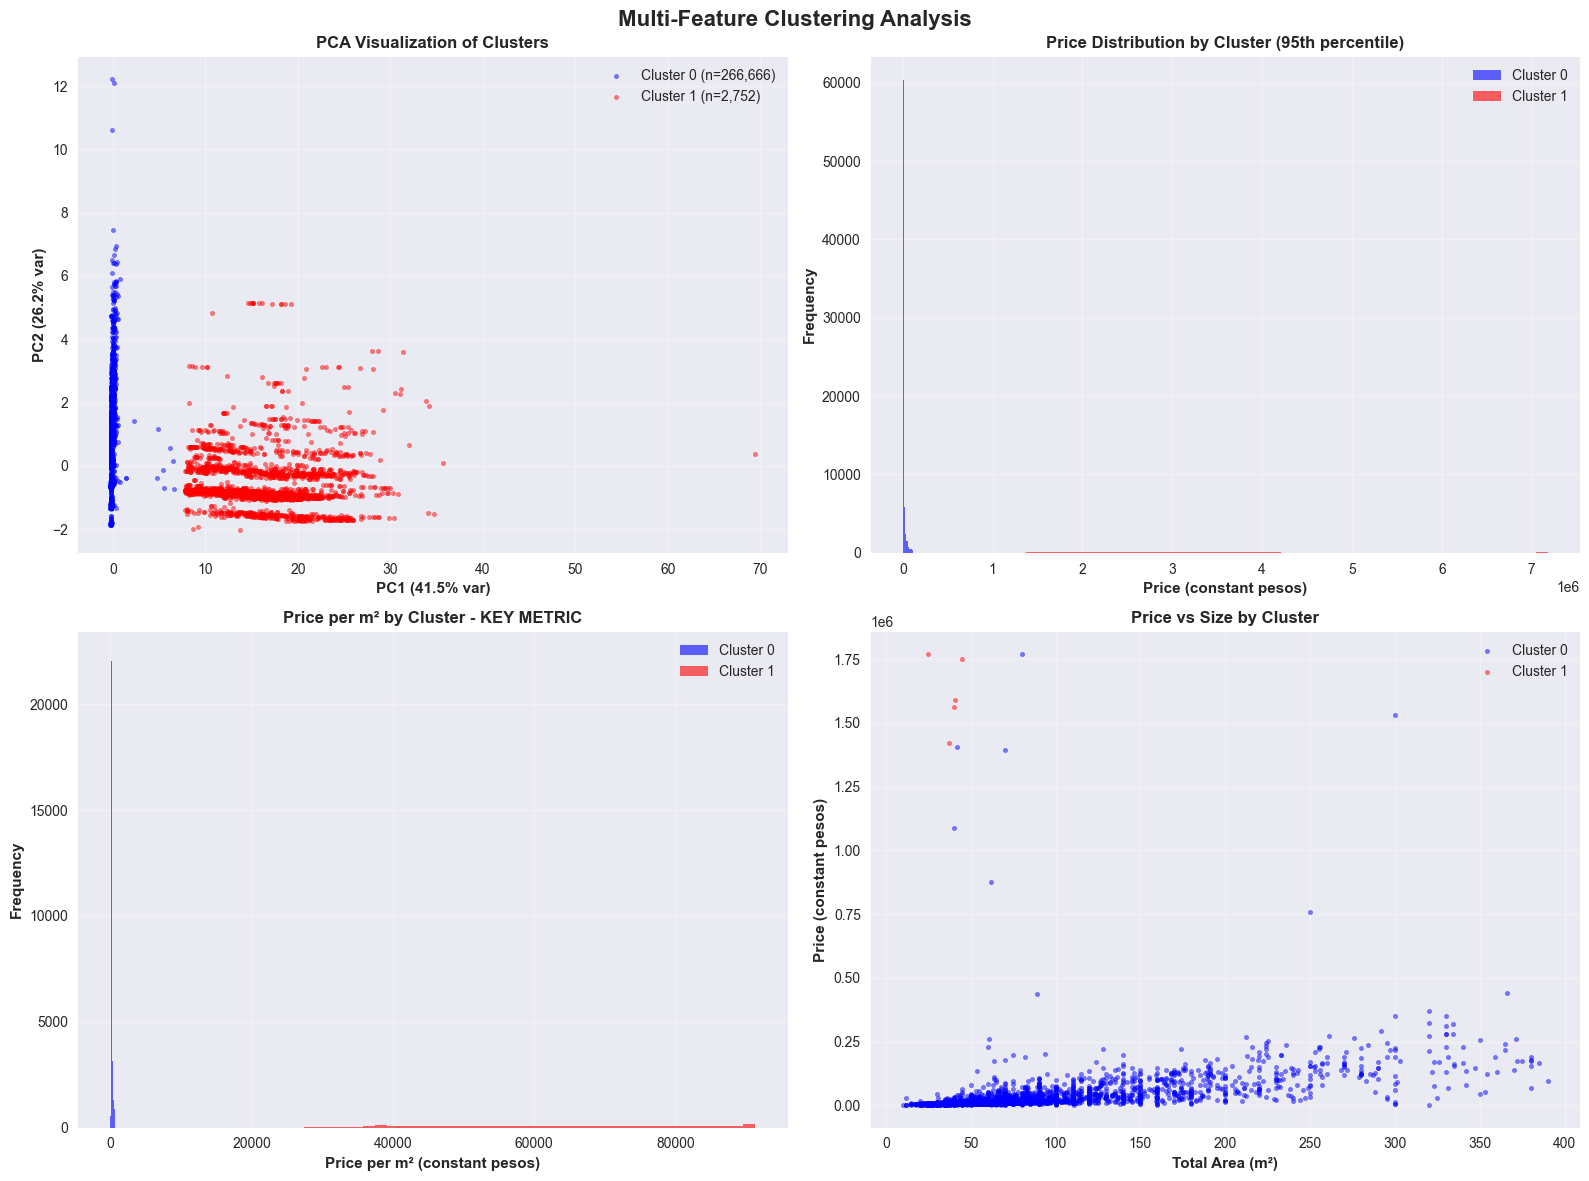


Creating box plot comparisons...


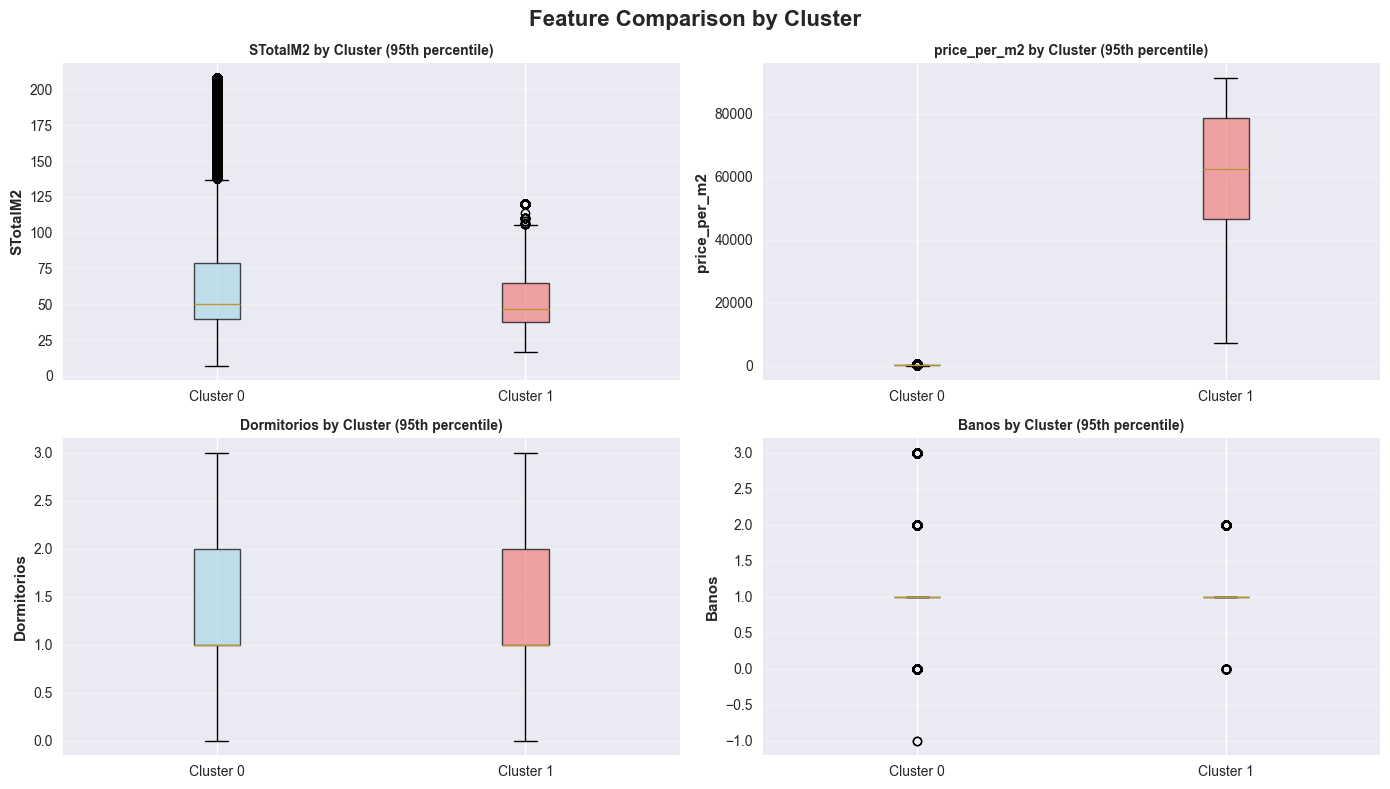

Visualizations complete!

SUCCESS - Clustering complete!

Clustered dataframe shape: (269418, 9)
New columns: ['price_per_m2', 'price_size_ratio', 'price_per_room', 'cluster']


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# ============================================================================
# SMART CLUSTERING - MULTI-FEATURE APPROACH (FIXED)
# ============================================================================

def smart_price_clustering(df, target_col='precio_pesos_constantes'):
    """
    Intelligent clustering using price + property characteristics.
    Sale properties tend to have different price-per-m2 ratios than rentals.
    """
    
    print("=" * 100)
    print("SMART CLUSTERING - MULTI-FEATURE ANALYSIS")
    print("=" * 100)
    
    # Select features for clustering
    feature_cols = [target_col, 'STotalM2', 'SConstrM2', 'Dormitorios', 'Banos']
    available_cols = [col for col in feature_cols if col in df.columns]
    
    if len(available_cols) < 2:
        print("ERROR: Not enough features for clustering")
        return None
    
    print(f"\nUsing features: {available_cols}")
    
    # Prepare data
    df_cluster = df[available_cols].copy()
    
    # Convert to numeric and drop nulls
    for col in available_cols:
        df_cluster[col] = pd.to_numeric(df_cluster[col], errors='coerce')
    
    df_cluster = df_cluster.dropna()
    
    # Remove invalid values (zeros, negatives, extreme outliers)
    print(f"\nInitial samples: {len(df_cluster):,}")
    
    # Filter out invalid data
    df_cluster = df_cluster[df_cluster[target_col] > 0]
    
    if 'STotalM2' in df_cluster.columns:
        df_cluster = df_cluster[df_cluster['STotalM2'] > 5]  # At least 5m²
        df_cluster = df_cluster[df_cluster['STotalM2'] < 10000]  # Max 10,000m²
    
    if 'Dormitorios' in df_cluster.columns:
        df_cluster = df_cluster[df_cluster['Dormitorios'] >= 0]
        df_cluster = df_cluster[df_cluster['Dormitorios'] <= 20]  # Max 20 bedrooms
    
    print(f"After cleaning: {len(df_cluster):,}")
    
    # Create derived features (these help distinguish rent from sale)
    if 'STotalM2' in df_cluster.columns and df_cluster['STotalM2'].min() > 0:
        # Price per m2 is KEY: rentals have different ratios than sales
        df_cluster['price_per_m2'] = df_cluster[target_col] / df_cluster['STotalM2']
        
        # Remove extreme outliers in derived feature
        price_per_m2_99 = df_cluster['price_per_m2'].quantile(0.99)
        df_cluster = df_cluster[df_cluster['price_per_m2'] < price_per_m2_99 * 2]
        
        # Price-to-size ratio (normalized)
        df_cluster['price_size_ratio'] = df_cluster[target_col] / np.sqrt(df_cluster['STotalM2'])
    
    if 'Dormitorios' in df_cluster.columns:
        # Price per bedroom (avoid division by zero)
        df_cluster['price_per_room'] = df_cluster[target_col] / (df_cluster['Dormitorios'] + 1)
    
    print(f"Final samples for clustering: {len(df_cluster):,}")
    
    # Features for clustering
    cluster_features = [col for col in df_cluster.columns if col != target_col]
    
    print(f"\nClustering features (including derived): {cluster_features}")
    
    # Check for inf/nan in features
    for col in cluster_features:
        inf_count = np.isinf(df_cluster[col]).sum()
        nan_count = df_cluster[col].isna().sum()
        if inf_count > 0 or nan_count > 0:
            print(f"  WARNING: {col} has {inf_count} inf and {nan_count} nan values")
    
    # Remove any remaining inf/nan
    df_cluster = df_cluster.replace([np.inf, -np.inf], np.nan)
    df_cluster = df_cluster.dropna(subset=cluster_features)
    
    print(f"After removing inf/nan: {len(df_cluster):,}")
    
    if len(df_cluster) < 100:
        print("ERROR: Not enough valid samples for clustering")
        return None
    
    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_cluster[cluster_features])
    
    # Check for any remaining issues
    if np.any(np.isnan(X_scaled)) or np.any(np.isinf(X_scaled)):
        print("ERROR: Scaled data contains inf/nan")
        return None
    
    # Perform clustering
    print("\nPerforming K-means clustering...")
    kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
    df_cluster['cluster'] = kmeans.fit_predict(X_scaled)
    
    # Analyze clusters
    print("\n" + "=" * 100)
    print("CLUSTER ANALYSIS")
    print("=" * 100)
    
    for cluster_id in [0, 1]:
        cluster_data = df_cluster[df_cluster['cluster'] == cluster_id]
        print(f"\nCluster {cluster_id} (n={len(cluster_data):,}, {len(cluster_data)/len(df_cluster)*100:.1f}%):")
        print(f"  Price:")
        print(f"    Mean: ${cluster_data[target_col].mean():,.0f}")
        print(f"    Median: ${cluster_data[target_col].median():,.0f}")
        print(f"    Min: ${cluster_data[target_col].min():,.0f}")
        print(f"    Max: ${cluster_data[target_col].max():,.0f}")
        
        if 'STotalM2' in cluster_data.columns:
            print(f"  Size (m²):")
            print(f"    Mean: {cluster_data['STotalM2'].mean():.1f}")
            print(f"    Median: {cluster_data['STotalM2'].median():.1f}")
            
            print(f"  Price per m²:")
            print(f"    Mean: ${cluster_data['price_per_m2'].mean():,.0f}")
            print(f"    Median: ${cluster_data['price_per_m2'].median():,.0f}")
        
        if 'Dormitorios' in cluster_data.columns:
            print(f"  Bedrooms:")
            print(f"    Mean: {cluster_data['Dormitorios'].mean():.1f}")
            print(f"    Median: {cluster_data['Dormitorios'].median():.1f}")
    
    # Identify rent vs sale based on price per m2
    if 'price_per_m2' in df_cluster.columns:
        cluster_price_per_m2 = df_cluster.groupby('cluster')['price_per_m2'].median()
        
        # Lower price per m2 typically = rent (monthly rate)
        # Higher price per m2 typically = sale (total purchase price)
        likely_rent = cluster_price_per_m2.idxmin()
        likely_sale = cluster_price_per_m2.idxmax()
        
        print("\n" + "=" * 100)
        print("INTERPRETATION (Based on Price per m²):")
        print("=" * 100)
        print(f"  Cluster {likely_rent} → Likely RENT")
        print(f"    Median price: ${df_cluster[df_cluster['cluster'] == likely_rent][target_col].median():,.0f}")
        print(f"    Median price per m²: ${cluster_price_per_m2.iloc[likely_rent]:,.0f}")
        print(f"  Cluster {likely_sale} → Likely SALE")
        print(f"    Median price: ${df_cluster[df_cluster['cluster'] == likely_sale][target_col].median():,.0f}")
        print(f"    Median price per m²: ${cluster_price_per_m2.iloc[likely_sale]:,.0f}")
        
        ratio_ppm2 = cluster_price_per_m2.iloc[likely_sale] / cluster_price_per_m2.iloc[likely_rent]
        print(f"  Price per m² ratio: {ratio_ppm2:.1f}x")
        
        # Check if clustering makes sense
        cluster_price_medians = df_cluster.groupby('cluster')[target_col].median()
        ratio_price = cluster_price_medians.max() / cluster_price_medians.min()
        
        print(f"\n  Total price ratio: {ratio_price:.1f}x")
        
        if ratio_ppm2 > 3:
            print("\n  CONCLUSION: Strong evidence of rent vs sale separation")
        elif ratio_ppm2 > 1.5:
            print("\n  CONCLUSION: Moderate evidence of different listing types")
        else:
            print("\n  CONCLUSION: Weak separation - may be same listing type")
    
    # Visualizations
    create_smart_visualizations(df_cluster, target_col, cluster_features)
    
    return df_cluster


def create_smart_visualizations(df_cluster, target_col, cluster_features):
    """Create visualizations for multi-feature clustering."""
    
    print("\nCreating visualizations...")
    
    # Figure 1: Main analysis
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. PCA plot
    try:
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(df_cluster[cluster_features])
        
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X_scaled)
        
        for cluster_id in [0, 1]:
            mask = df_cluster['cluster'] == cluster_id
            color = 'blue' if cluster_id == 0 else 'red'
            label = f'Cluster {cluster_id} (n={mask.sum():,})'
            
            # Sample for faster plotting
            sample_size = min(5000, mask.sum())
            sample_indices = df_cluster[mask].sample(sample_size, random_state=42).index
            mask_sampled = df_cluster.index.isin(sample_indices)
            
            axes[0, 0].scatter(X_pca[mask_sampled, 0], X_pca[mask_sampled, 1], 
                              c=color, alpha=0.5, s=10, label=label)
        
        axes[0, 0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% var)', fontweight='bold')
        axes[0, 0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% var)', fontweight='bold')
        axes[0, 0].set_title('PCA Visualization of Clusters', fontweight='bold', fontsize=12)
        axes[0, 0].legend()
        axes[0, 0].grid(alpha=0.3)
    except Exception as e:
        axes[0, 0].text(0.5, 0.5, f'PCA error: {str(e)}', ha='center', va='center', transform=axes[0, 0].transAxes)
    
    # 2. Price distribution by cluster
    for cluster_id in [0, 1]:
        cluster_prices = df_cluster[df_cluster['cluster'] == cluster_id][target_col]
        clip_val = cluster_prices.quantile(0.95)
        cluster_prices_viz = cluster_prices.clip(upper=clip_val)
        
        color = 'blue' if cluster_id == 0 else 'red'
        axes[0, 1].hist(cluster_prices_viz, bins=50, alpha=0.6, 
                       color=color, label=f'Cluster {cluster_id}')
    
    axes[0, 1].set_xlabel('Price (constant pesos)', fontweight='bold')
    axes[0, 1].set_ylabel('Frequency', fontweight='bold')
    axes[0, 1].set_title('Price Distribution by Cluster (95th percentile)', fontweight='bold', fontsize=12)
    axes[0, 1].legend()
    axes[0, 1].grid(alpha=0.3)
    
    # 3. Price per m² distribution (KEY METRIC)
    if 'price_per_m2' in df_cluster.columns:
        for cluster_id in [0, 1]:
            cluster_ppm2 = df_cluster[df_cluster['cluster'] == cluster_id]['price_per_m2']
            clip_val = cluster_ppm2.quantile(0.95)
            cluster_ppm2_viz = cluster_ppm2.clip(upper=clip_val)
            
            color = 'blue' if cluster_id == 0 else 'red'
            axes[1, 0].hist(cluster_ppm2_viz, bins=50, alpha=0.6, 
                           color=color, label=f'Cluster {cluster_id}')
        
        axes[1, 0].set_xlabel('Price per m² (constant pesos)', fontweight='bold')
        axes[1, 0].set_ylabel('Frequency', fontweight='bold')
        axes[1, 0].set_title('Price per m² by Cluster - KEY METRIC', fontweight='bold', fontsize=12)
        axes[1, 0].legend()
        axes[1, 0].grid(alpha=0.3)
    
    # 4. Scatter: Price vs Size colored by cluster
    if 'STotalM2' in df_cluster.columns:
        sample_size = min(5000, len(df_cluster))
        df_sample = df_cluster.sample(sample_size, random_state=42)
        
        # Clip for visualization
        price_clip = df_sample[target_col].quantile(0.99)
        size_clip = df_sample['STotalM2'].quantile(0.99)
        
        df_viz = df_sample[
            (df_sample[target_col] <= price_clip) & 
            (df_sample['STotalM2'] <= size_clip)
        ]
        
        for cluster_id in [0, 1]:
            mask = df_viz['cluster'] == cluster_id
            color = 'blue' if cluster_id == 0 else 'red'
            axes[1, 1].scatter(df_viz[mask]['STotalM2'], 
                              df_viz[mask][target_col],
                              c=color, alpha=0.5, s=10, 
                              label=f'Cluster {cluster_id}')
        
        axes[1, 1].set_xlabel('Total Area (m²)', fontweight='bold')
        axes[1, 1].set_ylabel('Price (constant pesos)', fontweight='bold')
        axes[1, 1].set_title('Price vs Size by Cluster', fontweight='bold', fontsize=12)
        axes[1, 1].legend()
        axes[1, 1].grid(alpha=0.3)
    
    plt.suptitle('Multi-Feature Clustering Analysis', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Figure 2: Box plot comparison
    print("\nCreating box plot comparisons...")
    
    comparison_features = ['STotalM2', 'price_per_m2', 'Dormitorios', 'Banos']
    available_features = [f for f in comparison_features if f in df_cluster.columns]
    
    if len(available_features) > 0:
        n_features = len(available_features)
        n_cols = 2
        n_rows = (n_features + 1) // 2
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 4))
        axes = axes.flatten() if n_features > 1 else [axes]
        
        for idx, feature in enumerate(available_features):
            if idx >= len(axes):
                break
            
            data_c0 = df_cluster[df_cluster['cluster'] == 0][feature]
            data_c1 = df_cluster[df_cluster['cluster'] == 1][feature]
            
            # Clip outliers for better visualization
            clip_val_c0 = data_c0.quantile(0.95)
            clip_val_c1 = data_c1.quantile(0.95)
            
            data_c0_viz = data_c0.clip(upper=clip_val_c0)
            data_c1_viz = data_c1.clip(upper=clip_val_c1)
            
            bp = axes[idx].boxplot([data_c0_viz, data_c1_viz], 
                                   labels=['Cluster 0', 'Cluster 1'],
                                   patch_artist=True)
            bp['boxes'][0].set_facecolor('lightblue')
            bp['boxes'][1].set_facecolor('lightcoral')
            for patch in bp['boxes']:
                patch.set_alpha(0.7)
            
            axes[idx].set_ylabel(feature, fontweight='bold')
            axes[idx].set_title(f'{feature} by Cluster (95th percentile)', fontweight='bold', fontsize=10)
            axes[idx].grid(alpha=0.3, axis='y')
        
        # Hide unused
        for idx in range(len(available_features), len(axes)):
            axes[idx].axis('off')
        
        plt.suptitle('Feature Comparison by Cluster', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()
    
    print("Visualizations complete!")


# Usage
print("Running SMART clustering with multiple features...")
df_smart_clusters = smart_price_clustering(df)

if df_smart_clusters is not None:
    print("\n" + "=" * 100)
    print("SUCCESS - Clustering complete!")
    print("=" * 100)
    print(f"\nClustered dataframe shape: {df_smart_clusters.shape}")
    print(f"New columns: {[col for col in df_smart_clusters.columns if col not in df.columns]}")
else:
    print("\n" + "=" * 100)
    print("ERROR - Clustering failed")
    print("=" * 100)

# 3 Diagnostico de calidad de datos

## 3.1. Detección y Eliminación de Duplicados exactos y temporales:

- Eliminar registros con características idénticas (STotalM2, SConstrM2, Dormitorios, Banos, precio, coordenadas)
- Para re-listings (mismo inmueble en múltiples meses): mantener solo el más reciente
- Caso detectado: 5 registros idénticos en Palermo ($35M, 200m², 3 dorm) - verificar si son duplicados
- Impacto esperado: reducción de 5-15% del dataset, prevención de data leakage

## 3.2. Filtrado de Propiedades

**Eliminar propiedades en venta:**
- Filtrar registros donde `precio_pesos_constantes` > $500,000 (umbral conservador)
- O usar clustering: eliminar cluster identificado como "venta" (price_per_m2 > $1,000)
- Validar con `ITE_TIPO_PROD` si hay patrones que indiquen ventas vs. alquileres
- **Resultado esperado:** Dataset reducido a ~226,000 registros (81% del total) enfocado solo en alquileres

## 3.3. Tratamiento de Valores Faltantes

**Eliminar columnas:**
- `TIPOPROPIEDAD` (una sola categoría sin varianza)
- `SitioOrigen` (32.5% faltantes, baja relevancia)
- Amenities con >25% faltantes: `PistaJogging`, `Lobby`, `LocalesComerciales`, `BusinessCenter`, `Chimenea`, `CanchaTennis`, `Recepcion`, `Estacionamiento`, `EstacionamientoVisitas`, `SalonFiestas`

**Imputar con 0 (amenity ausente):**
- Todas las amenities binarias restantes: `Jacuzzi`, `SalonDeUsosMul`, `Seguridad`, `Gimnasio`, `Laundry`, `Pileta`, `AireAC`, `Ascensor`, `Cisterna`, `AreaJuegosInfantiles`, `AreaCine`, `SistContraIncendios`, `AreaParrillas`, `Calefaccion`, `AccesoInternet`

**Imputar con mediana:**
- `STotalM2`, `SConstrM2` (<0.01% faltantes)

**Imputar con moda:**
- `ITE_ADD_NEIGHBORHOOD_NAME` (4.7% faltantes)

## 3.4. Estandarización de Variables Categóricas

**Amenities booleanas:**
- Unificar formatos inconsistentes: `"0"`, `"0.0"`, `"No"`, `" 0"` → `0`
- Convertir `"Sí"`, `"1"`, `"1.0"` → `1`

**`Antiguedad`:**
- Extraer valores numéricos de formatos mixtos: `"40 años"` → `40`
- Casos especiales: `"0 años"`, `"0.0"` → `0`
- Manejar valores extremos (>200) como errores de datos

**`Amoblado`:**
- Convertir a binario: `"Sí"` → `1`, `"No"` → `0`

## 3.5. Detección y Tratamiento de Outliers

**Eliminar outliers extremos (errores de datos):**
- `precio_pesos_constantes` < $1,000 o > $200,000 (para alquileres)
- `STotalM2` o `SConstrM2` > 1,000 m² o = 0
- `Dormitorios` > 8 (verificar si son comerciales)
- `Banos` > 8 o < 0
- `Ambientes` > 10
- `Antiguedad` > 200 años o = 9,999 (placeholder)
- `Cocheras` < 0 o > 10

**Winsorización (limitar percentiles):**
- `precio_pesos_constantes`: limitar al percentil 1-99
- `STotalM2`, `SConstrM2`: limitar al percentil 5-95

## 3.6. Transformaciones de Variables

**Transformación logarítmica (para reducir asimetría):**
- `precio_pesos_constantes` (target) → `log_precio`
- `STotalM2`, `SConstrM2` → `log_stotal`, `log_sconstr`
- Considerar para: `Antiguedad`, `Cocheras`

**Normalización/Estandarización:**
- Todas las variables numéricas continuas (después de transformaciones)
- Método: StandardScaler o MinMaxScaler según el modelo

## 3.7. Ingeniería de Features

**Crear variables derivadas:**
- `precio_por_m2` = precio / STotalM2
- `ratio_construccion` = SConstrM2 / STotalM2
- `total_amenities` = suma de todas las amenities binarias
- `densidad_ambientes` = Ambientes / STotalM2
- `tiene_cochera` = (Cocheras > 0)
- `score_lujo` = peso ponderado de amenities premium (pileta, gimnasio, seguridad)

**Features temporales:**
- `mes` y `año` desde `MesListing`
- `estacionalidad` = agrupación de meses (verano, otoño, invierno, primavera)

**Codificación de ubicación:**
- Target encoding para `ITE_ADD_NEIGHBORHOOD_NAME` (503 categorías)
- One-hot encoding para `ITE_ADD_CITY_NAME` (39 categorías)
- One-hot o label encoding para `ITE_ADD_STATE_NAME` (4 categorías)
- Mantener `LONGITUDE` y `LATITUDE` como variables continuas

## 3.8. Resolución de Multicolinealidad

**Eliminar variables redundantes:**
- Mantener `STotalM2`, eliminar `SConstrM2` (correlación ≈ 1.0)
- Evaluar mantener solo `Ambientes` y eliminar `Dormitorios` (correlación = 0.88)
- Alternativa: crear feature de interacción: `Dormitorios × Ambientes`

## 3.9. Validación de Consistencia

**Reglas de negocio:**
- `SConstrM2` ≤ `STotalM2` (superficie construida no puede exceder total)
- `Dormitorios` ≤ `Ambientes` (dormitorios no pueden superar ambientes totales)
- `Banos` ≥ 0 y lógico según tamaño de propiedad

**Identificar y corregir/eliminar registros inconsistentes**

## 3.10. Reducción de Dimensionalidad (opcional)

**Si se mantienen muchas amenities:**
- PCA sobre variables de amenities correlacionadas
- Feature selection basado en importancia (post-modelo inicial)

## 3.11. División del Dataset

**Estrategia de splits:**
- Train/Test: 80/20 o 70/30
- Cross-validation: 5-fold o 10-fold
- Estratificar por: `ITE_ADD_CITY_NAME` o rangos de precio para mantener distribución geográfica y de precios

# 4. Transformaciones Realizadas
Realizadas en notebook aparte.

# 5. Reflexión Final

## 5.1 Decisiones Tomadas y Justificación
**Decisiones principales tomadas durante el análisis:**

1. **Eliminación de Duplicados:**
   - **Decisión**: Eliminar registros duplicados exactos
   - **Justificación**: Los duplicados pueden sesgar el modelo y no aportan información adicional
   - **Impacto**: Mejora la calidad del dataset sin pérdida significativa de información

2. **Corrección de Inconsistencias Lógicas:**
   - **Decisión**: Ajustar valores donde superficie construida > superficie total
   - **Justificación**: Mantiene la coherencia física de los datos
   - **Impacto**: Datos más realistas y confiables para el modelado

3. **Winsorización de Outliers:**
   - **Decisión**: Aplicar winsorización al 1% y 99% en lugar de eliminar outliers
   - **Justificación**: Preserva la información de valores extremos pero reduce su impacto
   - **Impacto**: Distribución más normalizada sin perder casos reales

4. **Creación de Variables Derivadas:**
   - **Decisión**: Crear precio por m², categorías de precio/superficie, y contador de amenities
   - **Justificación**: Estas variables pueden ser más predictivas que las originales
   - **Impacto**: Enriquece el dataset con información más interpretable

5. **Codificación One-Hot para Variables Categóricas:**
   - **Decisión**: Usar one-hot encoding para variables categóricas principales
   - **Justificación**: Permite al modelo capturar relaciones no lineales entre categorías
   - **Impacto**: Aumenta la dimensionalidad pero mejora la capacidad predictiva

## 5.2 Principales desafíos enfrentados

1. **Dimensionalidad Alta:**
   - **Problema**: El dataset original tiene 52 columnas, muchas con alta cardinalidad
   - **Solución**: Creación de variables binarias para amenities y categorización de variables continuas
   - **Resultado**: Dataset más manejable pero con mayor dimensionalidad

2. **Inconsistencias en Variables Categóricas:**
   - **Problema**: Valores como "Sí", "Si", "1", "1.0" para la misma condición
   - **Solución**: Estandarización de valores categóricos y creación de variables binarias
   - **Resultado**: Variables más consistentes y fáciles de interpretar

3. **Valores Extremos en Precios:**
   - **Problema**: Rango muy amplio de precios (desde muy bajos hasta muy altos)
   - **Solución**: Winsorización para reducir el impacto sin eliminar casos
   - **Resultado**: Distribución más normalizada manteniendo la variabilidad natural

4. **Complejidad de Amenities:**
   - **Problema**: 30+ variables de amenities con diferentes formatos
   - **Solución**: Binarización y creación de contador total de amenities
   - **Resultado**: Información consolidada y más interpretable

5. **Memoria y Rendimiento:**
   - **Problema**: Dataset grande (278K registros) con muchas transformaciones
   - **Solución**: Procesamiento por pasos y uso eficiente de memoria
   - **Resultado**: Proceso manejable pero requiere optimización para datasets más grandes

## Conclusiones del Análisis Exploratorio

Este análisis exploratorio de datos ha proporcionado una base sólida para el desarrollo del modelo de predicción de precios de alquiler en el AMBA.

**Calidad del Dataset:**
- El dataset presenta buena calidad general con pocos valores faltantes
- Se identificaron y corrigieron inconsistencias lógicas importantes
- La limpieza de datos mejoró significativamente la confiabilidad del dataset

**Próximos Pasos:**
El dataset está ahora preparado para el desarrollo de modelos de machine learning. El siguiente entregable se enfocará en la construcción, entrenamiento y evaluación de modelos predictivos, con el objetivo de alcanzar un rendimiento robusto y interpretable.
